In [139]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [918]:
df = pd.read_excel('2012_2019.xlsx')

In [922]:
df

,Month-Year,AREA I,AREA II,AREA III,AREA IV,AREA IX,AREA V,AREA VI,AREA VII,AREA VIII,...,AREA XI,AREA XII,AREA XIII,AREA XIV,AREA XV,MAX,MIN,AW,RF,EVP
0,2012-01-01,3.00,1.870,2.544444,2.255556,2.027778,2.727778,1.020,1.966667,1.869231,...,2.520,1.750000,2.350000,2.200000,1.669231,30.264516,20.435484,4.354839,1.312903,2.867742
1,2012-02-01,3.17,2.060,2.850000,2.800000,2.678889,3.316667,1.640,2.945833,2.615385,...,3.120,2.466667,2.860526,2.627273,2.188462,31.968966,20.913793,4.620690,0.000000,3.858621
2,2012-03-01,3.25,2.322,3.170000,3.366667,3.195556,3.994444,2.064,3.345000,3.173077,...,3.984,2.653333,3.357895,3.414545,2.662308,35.219355,24.090323,7.516129,0.000000,5.200000
3,2012-04-01,3.23,2.500,3.633333,3.777778,4.011111,4.338889,2.290,4.454167,4.030769,...,4.770,3.700000,4.339474,4.172727,3.326923,36.073333,26.570000,8.400000,0.073333,5.400000
4,2012-05-01,3.51,2.820,4.055556,4.277778,4.422222,4.611111,3.170,5.470833,4.361538,...,5.250,4.466667,4.821053,4.863636,3.742308,40.090323,28.506452,8.580645,0.006452,6.854839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2019-08-01,4.78,5.410,7.611111,7.744444,6.483333,7.744444,8.340,9.158333,6.734615,...,6.580,8.608333,7.136842,5.318182,5.284615,35.003226,25.929032,6.870968,5.545161,5.486667
92,2019-09-01,4.53,4.990,6.300000,7.005556,5.977778,7.222222,5.740,7.491667,5.807692,...,6.340,7.950000,6.321053,4.718182,4.346154,33.350000,25.196667,4.700000,8.173333,4.746429
93,2019-10-01,4.24,4.090,4.711111,6.788889,5.300000,6.922222,5.240,5.450000,4.069231,...,4.680,6.016667,4.900000,4.209091,3.923077,32.122581,24.948387,2.500000,10.112903,5.183871
94,2019-11-01,3.72,3.690,4.255556,6.077778,4.622222,6.466667,4.860,4.483333,3.738462,...,3.640,5.216667,4.226316,3.790909,3.323077,31.656000,24.216000,2.920000,9.192000,6.450000


In [919]:
ddf = pd.read_excel('Menambakkam_Monthly_Input_Data.xlsx')

In [920]:
ddf.drop('Unnamed: 0', axis = 1, inplace = True)
ddf = ddf.iloc[24:]

In [921]:
ddf.head()

,YEAR,MN,MAX,MIN,AW,RF,EVP
24,2012,1,30.264516,20.435484,4.354839,1.312903,2.867742
25,2012,2,31.968966,20.913793,4.620690,0.000000,3.858621
26,2012,3,35.219355,24.090323,7.516129,0.000000,5.200000
27,2012,4,36.073333,26.570000,8.400000,0.073333,5.400000
28,2012,5,40.090323,28.506452,8.580645,0.006452,6.854839


In [912]:
ddf.reset_index(drop = True)

,YEAR,MN,MAX,MIN,AW,RF,EVP
0,2012,1,30.264516,20.435484,4.354839,1.312903,2.867742
1,2012,2,31.968966,20.913793,4.620690,0.000000,3.858621
2,2012,3,35.219355,24.090323,7.516129,0.000000,5.200000
3,2012,4,36.073333,26.570000,8.400000,0.073333,5.400000
4,2012,5,40.090323,28.506452,8.580645,0.006452,6.854839
...,...,...,...,...,...,...,...
111,2021,4,36.240000,27.003333,6.862069,0.933333,5.263333
112,2021,6,36.946667,27.350000,4.629630,2.870000,5.875000
113,2021,7,34.903226,25.583871,3.233333,4.848276,4.638710
114,2021,8,34.510000,25.600000,3.233333,5.216667,4.750000


In [913]:
ddf.head()

,YEAR,MN,MAX,MIN,AW,RF,EVP
24,2012,1,30.264516,20.435484,4.354839,1.312903,2.867742
25,2012,2,31.968966,20.913793,4.620690,0.000000,3.858621
26,2012,3,35.219355,24.090323,7.516129,0.000000,5.200000
27,2012,4,36.073333,26.570000,8.400000,0.073333,5.400000
28,2012,5,40.090323,28.506452,8.580645,0.006452,6.854839


In [917]:
df.columns

Index(['AREA I', 'AREA II', 'AREA III', 'AREA IV', 'AREA IX', 'AREA V',
       'AREA VI', 'AREA VII', 'AREA VIII', 'AREA X', 'AREA XI', 'AREA XII',
       'AREA XIII', 'AREA XIV', 'AREA XV', 'MAX', 'MIN', 'AW', 'RF', 'EVP'],
      dtype='object')

In [880]:
df.set_index('Month-Year', inplace=True)

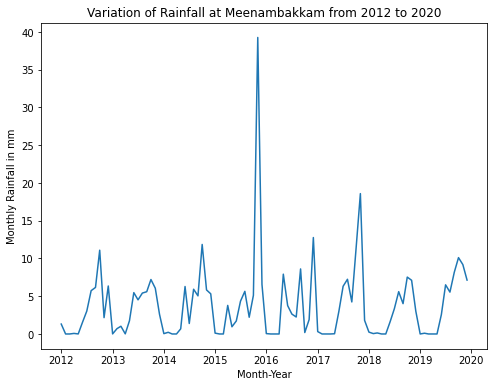

In [925]:
plt.figure(figsize = (8,6))
plt.plot(df['Month-Year'], df['RF'])
plt.title('Variation of Rainfall at Meenambakkam from 2012 to 2020')
plt.xlabel('Month-Year')
plt.ylabel('Monthly Rainfall in mm')
plt.show()

In [894]:
df.head()

,AREA I,AREA II,AREA III,AREA IV,AREA IX,AREA V,AREA VI,AREA VII,AREA VIII,AREA X,AREA XI,AREA XII,AREA XIII,AREA XIV,AREA XV,MAX,MIN,AW,RF,EVP
Month-Year,,,,,,,,,,,,,,,,,,,,
2012-01-01,3.00,1.870,2.544444,2.255556,2.027778,2.727778,1.020,1.966667,1.869231,1.890,2.520,1.750000,2.350000,2.200000,1.669231,30.264516,20.435484,4.354839,1.312903,2.867742
2012-02-01,3.17,2.060,2.850000,2.800000,2.678889,3.316667,1.640,2.945833,2.615385,3.095,3.120,2.466667,2.860526,2.627273,2.188462,31.968966,20.913793,4.620690,0.000000,3.858621
2012-03-01,3.25,2.322,3.170000,3.366667,3.195556,3.994444,2.064,3.345000,3.173077,3.758,3.984,2.653333,3.357895,3.414545,2.662308,35.219355,24.090323,7.516129,0.000000,5.200000
2012-04-01,3.23,2.500,3.633333,3.777778,4.011111,4.338889,2.290,4.454167,4.030769,4.375,4.770,3.700000,4.339474,4.172727,3.326923,36.073333,26.570000,8.400000,0.073333,5.400000
2012-05-01,3.51,2.820,4.055556,4.277778,4.422222,4.611111,3.170,5.470833,4.361538,4.740,5.250,4.466667,4.821053,4.863636,3.742308,40.090323,28.506452,8.580645,0.006452,6.854839


In [650]:
areas = ['AREA I', 'AREA II', 'AREA III', 'AREA IV', 'AREA IX',
       'AREA V', 'AREA VI', 'AREA VII', 'AREA VIII', 'AREA X', 'AREA XI',
       'AREA XII', 'AREA XIII', 'AREA XIV', 'AREA XV']

df[areas].corr()

,AREA I,AREA II,AREA III,AREA IV,AREA IX,AREA V,AREA VI,AREA VII,AREA VIII,AREA X,AREA XI,AREA XII,AREA XIII,AREA XIV,AREA XV
AREA I,1.000000,0.958957,0.922798,0.903971,0.921513,0.922066,0.892167,0.913279,0.915137,0.882283,0.893111,0.912601,0.911492,0.826250,0.892657
AREA II,0.958957,1.000000,0.934020,0.951161,0.935513,0.957041,0.932661,0.919295,0.908918,0.905543,0.882394,0.922560,0.934828,0.809815,0.898568
AREA III,0.922798,0.934020,1.000000,0.883519,0.885055,0.888644,0.890533,0.965550,0.917758,0.847256,0.892116,0.951772,0.947093,0.892701,0.928489
AREA IV,0.903971,0.951161,0.883519,1.000000,0.910024,0.977488,0.912580,0.851535,0.852726,0.873673,0.838476,0.895235,0.891477,0.749912,0.865869
AREA IX,0.921513,0.935513,0.885055,0.910024,1.000000,0.904870,0.953648,0.916899,0.951501,0.929204,0.929583,0.922588,0.937235,0.796487,0.902162
AREA V,0.922066,0.957041,0.888644,0.977488,0.904870,1.000000,0.912260,0.851978,0.853389,0.878676,0.824533,0.884937,0.881056,0.727307,0.837821
AREA VI,0.892167,0.932661,0.890533,0.912580,0.953648,0.912260,1.000000,0.907810,0.908709,0.910683,0.888229,0.915195,0.923777,0.777554,0.887332
AREA VII,0.913279,0.919295,0.965550,0.851535,0.916899,0.851978,0.907810,1.000000,0.954865,0.868909,0.913015,0.935816,0.936499,0.905715,0.936353
AREA VIII,0.915137,0.908918,0.917758,0.852726,0.951501,0.853389,0.908709,0.954865,1.000000,0.878442,0.916905,0.931421,0.912716,0.855756,0.892927
AREA X,0.882283,0.905543,0.847256,0.873673,0.929204,0.878676,0.910683,0.868909,0.878442,1.000000,0.921874,0.857299,0.889904,0.780047,0.839481


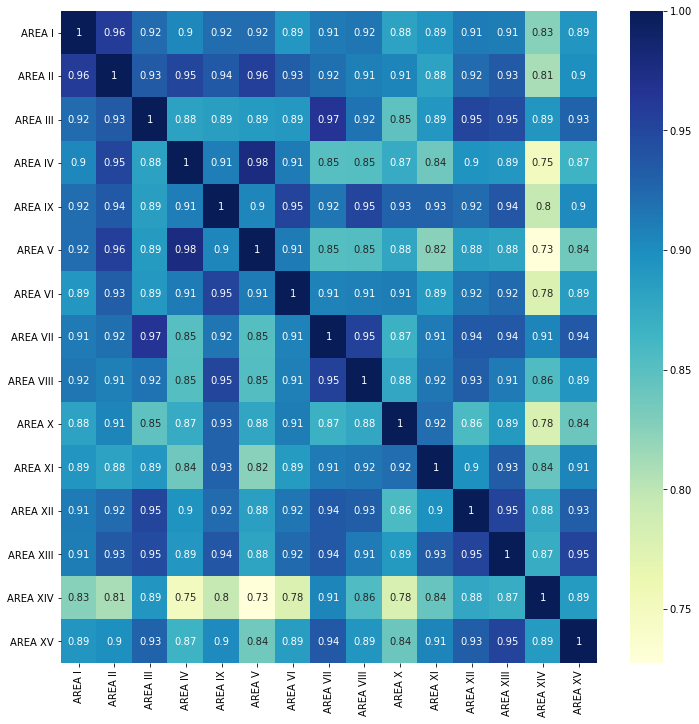

In [651]:
plt.figure(figsize=(12,12)) 
dataplot = sns.heatmap(df[areas].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [652]:
features = ['MAX', 'MIN', 'AW','RF', 'EVP']
df[features].corr()

,MAX,MIN,AW,RF,EVP
MAX,1.000000,0.916093,0.874826,-0.248529,0.649672
MIN,0.916093,1.000000,0.768476,-0.021124,0.637452
AW,0.874826,0.768476,1.000000,-0.286531,0.532567
RF,-0.248529,-0.021124,-0.286531,1.000000,-0.250123
EVP,0.649672,0.637452,0.532567,-0.250123,1.000000


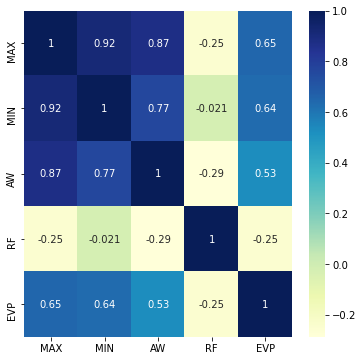

In [653]:
plt.figure(figsize=(6,6)) 
dataplot = sns.heatmap(df[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [882]:
features = ['MAX', 'MIN', 'AW','RF', 'EVP']
df01[features].corr()

,MAX,MIN,AW,RF,EVP
MAX,1.000000,0.941573,0.331708,-0.189171,0.661964
MIN,0.941573,1.000000,0.337844,-0.031042,0.607758
AW,0.331708,0.337844,1.000000,0.020369,0.209304
RF,-0.189171,-0.031042,0.020369,1.000000,-0.292098
EVP,0.661964,0.607758,0.209304,-0.292098,1.000000


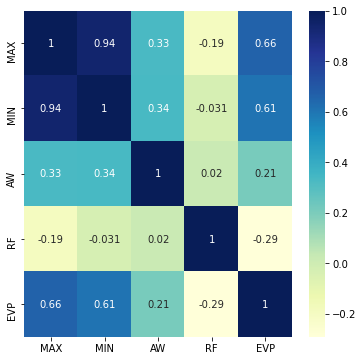

In [883]:
plt.figure(figsize=(6,6)) 
dataplot = sns.heatmap(df01[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [654]:
df01 = pd.DataFrame(columns = ['Month-Year', 'AREA I', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df02 = pd.DataFrame(columns = ['Month-Year', 'AREA II', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df03 = pd.DataFrame(columns = ['Month-Year', 'AREA III', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df04 = pd.DataFrame(columns = ['Month-Year', 'AREA IV', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df05 = pd.DataFrame(columns = ['Month-Year', 'AREA V', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df06 = pd.DataFrame(columns = ['Month-Year', 'AREA VI', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df07 = pd.DataFrame(columns = ['Month-Year', 'AREA VII', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df08 = pd.DataFrame(columns = ['Month-Year', 'AREA VIII', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df09 = pd.DataFrame(columns = ['Month-Year', 'AREA IX', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df10 = pd.DataFrame(columns = ['Month-Year', 'AREA X', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df11 = pd.DataFrame(columns = ['Month-Year', 'AREA XI', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df12 = pd.DataFrame(columns = ['Month-Year', 'AREA XII', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df13 = pd.DataFrame(columns = ['Month-Year', 'AREA XIII', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df14 = pd.DataFrame(columns = ['Month-Year', 'AREA XIV', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])
df15 = pd.DataFrame(columns = ['Month-Year', 'AREA XV', 'MAX', 'MIN', 'AW', 'RF', 'EVP'])

In [723]:
df_full = pd.read_excel('2012_2020.xlsx')

In [724]:
df_test = df_full.iloc[-10:]

In [725]:
df_test

,Month-Year,AREA I,AREA II,AREA III,AREA IV,AREA IX,AREA V,AREA VI,AREA VII,AREA VIII,AREA X,AREA XI,AREA XII,AREA XIII,AREA XIV,AREA XV
96,Jan-2020,4.46,3.97,5.133333,5.833333,4.955556,6.400000,5.02,5.066667,4.084615,5.830,5.30,5.166667,4.273684,3.600000,2.761538
97,Feb-2020,4.70,4.23,5.555556,6.105556,5.433333,6.700000,5.41,5.983333,4.792308,6.330,6.32,5.766667,4.821053,4.204545,3.130769
98,May-2020,5.18,5.26,6.522222,6.255556,5.633333,7.072222,7.52,7.716667,5.811538,6.930,6.40,6.950000,5.447368,5.427273,3.923077
99,Jun-2020,5.56,5.69,6.988889,7.355556,6.511111,7.522222,7.94,8.333333,6.307692,7.390,6.84,7.683333,6.068421,6.272727,4.492308
100,Jul-2020,4.68,4.38,5.688889,6.388889,4.922222,6.616667,6.42,7.266667,4.942308,5.175,5.08,5.516667,4.302632,3.709091,3.138462
101,Aug-2020,4.77,4.40,5.966667,6.550000,4.977778,6.794444,6.76,7.416667,4.826923,5.145,5.58,5.516667,4.134211,3.954545,2.980769
102,Sep-2020,4.95,4.19,5.622222,6.533333,4.672222,6.644444,5.96,6.683333,4.492308,5.085,5.60,5.591667,4.160526,3.945455,2.846154
103,Oct-2020,4.50,3.64,4.955556,6.183333,4.438889,6.444444,5.22,5.783333,3.569231,4.755,4.90,5.183333,3.863158,3.659091,2.600000
104,Nov-2020,3.28,2.37,3.366667,4.805556,2.738889,4.894444,2.56,2.966667,2.146154,3.220,2.96,2.883333,1.786842,1.818182,1.769231
105,Dec-2020,3.13,2.25,3.300000,4.672222,2.516667,4.644444,2.52,2.879167,1.923077,2.835,2.36,2.200000,1.568421,1.640909,1.492308


In [663]:
df_nungam = pd.read_excel('nungam2012_2019.xlsx')

In [664]:
df_nungam

,Month-Year,AREA I,AREA II,AREA III,AREA IV,AREA IX,AREA V,AREA VI,AREA VII,AREA VIII,...,AREA XI,AREA XII,AREA XIII,AREA XIV,AREA XV,MAX,MIN,AW,RF,EVP
0,2012-01-01,3.00,1.870,2.544444,2.255556,2.027778,2.727778,1.020,1.966667,1.869231,...,2.520,1.750000,2.350000,2.200000,1.669231,29.432258,21.296774,4.161290,0.525806,2.867742
1,2012-02-01,3.17,2.060,2.850000,2.800000,2.678889,3.316667,1.640,2.945833,2.615385,...,3.120,2.466667,2.860526,2.627273,2.188462,30.827586,21.565517,4.344828,0.000000,3.858621
2,2012-03-01,3.25,2.322,3.170000,3.366667,3.195556,3.994444,2.064,3.345000,3.173077,...,3.984,2.653333,3.357895,3.414545,2.662308,33.632258,25.058065,4.870968,0.051613,5.200000
3,2012-04-01,3.23,2.500,3.633333,3.777778,4.011111,4.338889,2.290,4.454167,4.030769,...,4.770,3.700000,4.339474,4.172727,3.326923,34.573333,27.606667,5.566667,0.006667,5.400000
4,2012-05-01,3.51,2.820,4.055556,4.277778,4.422222,4.611111,3.170,5.470833,4.361538,...,5.250,4.466667,4.821053,4.863636,3.742308,38.612903,29.354839,6.677419,0.000000,6.854839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2019-08-01,4.78,5.410,7.611111,7.744444,6.483333,7.744444,8.340,9.158333,6.734615,...,6.580,8.608333,7.136842,5.318182,5.284615,35.293548,26.719355,8.354839,3.900000,5.486667
92,2019-09-01,4.53,4.990,6.300000,7.005556,5.977778,7.222222,5.740,7.491667,5.807692,...,6.340,7.950000,6.321053,4.718182,4.346154,33.530000,25.656667,5.700000,6.136667,4.746429
93,2019-10-01,4.24,4.090,4.711111,6.788889,5.300000,6.922222,5.240,5.450000,4.069231,...,4.680,6.016667,4.900000,4.209091,3.923077,32.077419,25.809677,5.000000,10.264516,5.183871
94,2019-11-01,3.72,3.690,4.255556,6.077778,4.622222,6.466667,4.860,4.483333,3.738462,...,3.640,5.216667,4.226316,3.790909,3.323077,32.043333,25.100000,6.766667,3.606667,6.450000


In [666]:
df01['Month-Year'] = df_nungam['Month-Year']
df01['AREA I'] = df_nungam['AREA I']
df01['MAX'] = df_nungam['MAX']
df01['MIN'] = df_nungam['MIN']
df01['AW']  = df_nungam['AW']
df01['RF']  = df_nungam['RF']
df01['EVP'] = df_nungam['EVP']

df02['Month-Year'] = df_nungam['Month-Year']
df02['AREA II'] = df_nungam['AREA II']
df02['MAX'] = df_nungam['MAX']
df02['MIN'] = df_nungam['MIN']
df02['AW']  = df_nungam['AW']
df02['RF']  = df_nungam['RF']
df02['EVP'] = df_nungam['EVP']

df03['Month-Year'] = df_nungam['Month-Year']
df03['AREA III'] = df_nungam['AREA III']
df03['MAX'] = df_nungam['MAX']
df03['MIN'] = df_nungam['MIN']
df03['AW']  = df_nungam['AW']
df03['RF']  = df_nungam['RF']
df03['EVP'] = df_nungam['EVP']

df04['Month-Year'] = df_nungam['Month-Year']
df04['AREA IV'] = df_nungam['AREA IV']
df04['MAX'] = df_nungam['MAX']
df04['MIN'] = df_nungam['MIN']
df04['AW']  = df_nungam['AW']
df04['RF']  = df_nungam['RF']
df04['EVP'] = df_nungam['EVP']

df05['Month-Year'] = df_nungam['Month-Year']
df05['AREA V'] = df_nungam['AREA V']
df05['MAX'] = df_nungam['MAX']
df05['MIN'] = df_nungam['MIN']
df05['AW']  = df_nungam['AW']
df05['RF']  = df_nungam['RF']
df05['EVP'] = df_nungam['EVP']

df06['Month-Year'] = df_nungam['Month-Year']
df06['AREA VI'] = df_nungam['AREA VI']
df06['MAX'] = df_nungam['MAX']
df06['MIN'] = df_nungam['MIN']
df06['AW']  = df_nungam['AW']
df06['RF']  = df_nungam['RF']
df06['EVP'] = df_nungam['EVP']

df07['Month-Year'] = df_nungam['Month-Year']
df07['AREA VII'] = df_nungam['AREA VII']
df07['MAX'] = df_nungam['MAX']
df07['MIN'] = df_nungam['MIN']
df07['AW']  = df_nungam['AW']
df07['RF']  = df_nungam['RF']
df07['EVP'] = df_nungam['EVP']

df08['Month-Year'] = df_nungam['Month-Year']
df08['AREA VIII'] = df_nungam['AREA VIII']
df08['MAX'] = df_nungam['MAX']
df08['MIN'] = df_nungam['MIN']
df08['AW']  = df_nungam['AW']
df08['RF']  = df_nungam['RF']
df08['EVP'] = df_nungam['EVP']

df09['Month-Year'] = df_nungam['Month-Year']
df09['AREA IX'] = df_nungam['AREA IX']
df09['MAX'] = df_nungam['MAX']
df09['MIN'] = df_nungam['MIN']
df09['AW']  = df_nungam['AW']
df09['RF']  = df_nungam['RF']
df09['EVP'] = df_nungam['EVP']

df10['Month-Year'] = df_nungam['Month-Year']
df10['AREA X'] = df_nungam['AREA X']
df10['MAX'] = df_nungam['MAX']
df10['MIN'] = df_nungam['MIN']
df10['AW']  = df_nungam['AW']
df10['RF']  = df_nungam['RF']
df10['EVP'] = df_nungam['EVP']

df11['Month-Year'] = df['Month-Year']
df11['AREA XI'] = df['AREA XI']
df11['MAX'] = df['MAX']
df11['MIN'] = df['MIN']
df11['AW']  = df['AW']
df11['RF']  = df['RF']
df11['EVP'] = df['EVP']

df12['Month-Year'] = df['Month-Year']
df12['AREA XII'] = df['AREA XII']
df12['MAX'] = df['MAX']
df12['MIN'] = df['MIN']
df12['AW']  = df['AW']
df12['RF']  = df['RF']
df12['EVP'] = df['EVP']

df13['Month-Year'] = df['Month-Year']
df13['AREA XIII'] = df['AREA XIII']
df13['MAX'] = df['MAX']
df13['MIN'] = df['MIN']
df13['AW']  = df['AW']
df13['RF']  = df['RF']
df13['EVP'] = df['EVP']

df14['Month-Year'] = df['Month-Year']
df14['AREA XIV'] = df['AREA XIV']
df14['MAX'] = df['MAX']
df14['MIN'] = df['MIN']
df14['AW']  = df['AW']
df14['RF']  = df['RF']
df14['EVP'] = df['EVP']

df15['Month-Year'] = df['Month-Year']
df15['AREA XV'] = df['AREA XV']
df15['MAX'] = df['MAX']
df15['MIN'] = df['MIN']
df15['AW']  = df['AW']
df15['RF']  = df['RF']
df15['EVP'] = df['EVP']

In [667]:
df03

,Month-Year,AREA III,MAX,MIN,AW,RF,EVP
0,2012-01-01,2.544444,29.432258,21.296774,4.161290,0.525806,2.867742
1,2012-02-01,2.850000,30.827586,21.565517,4.344828,0.000000,3.858621
2,2012-03-01,3.170000,33.632258,25.058065,4.870968,0.051613,5.200000
3,2012-04-01,3.633333,34.573333,27.606667,5.566667,0.006667,5.400000
4,2012-05-01,4.055556,38.612903,29.354839,6.677419,0.000000,6.854839
...,...,...,...,...,...,...,...
91,2019-08-01,7.611111,35.293548,26.719355,8.354839,3.900000,5.486667
92,2019-09-01,6.300000,33.530000,25.656667,5.700000,6.136667,4.746429
93,2019-10-01,4.711111,32.077419,25.809677,5.000000,10.264516,5.183871
94,2019-11-01,4.255556,32.043333,25.100000,6.766667,3.606667,6.450000


In [668]:
df01.set_index('Month-Year', inplace=True)
df02.set_index('Month-Year', inplace=True)
df03.set_index('Month-Year', inplace=True)
df04.set_index('Month-Year', inplace=True)
df05.set_index('Month-Year', inplace=True)
df06.set_index('Month-Year', inplace=True)
df07.set_index('Month-Year', inplace=True)
df08.set_index('Month-Year', inplace=True)
df09.set_index('Month-Year', inplace=True)
df10.set_index('Month-Year', inplace=True)
df11.set_index('Month-Year', inplace=True)
df12.set_index('Month-Year', inplace=True)
df13.set_index('Month-Year', inplace=True)
df14.set_index('Month-Year', inplace=True)
df15.set_index('Month-Year', inplace=True)

<AxesSubplot:xlabel='Month-Year'>

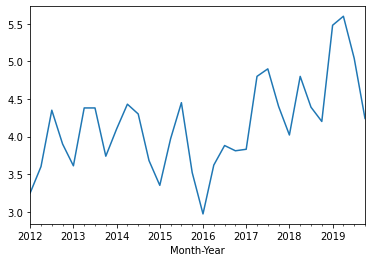

In [669]:
df01['AREA I'].resample(rule = 'QS').max().plot()

In [38]:
df01['Month-Year'] = pd.to_datetime(df01['Month-Year'], errors = 'coerce')

<AxesSubplot:xlabel='Month-Year'>

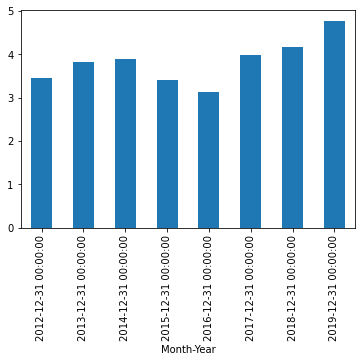

In [51]:
df01['AREA I'].resample(rule = 'A').mean().plot(kind = 'bar')

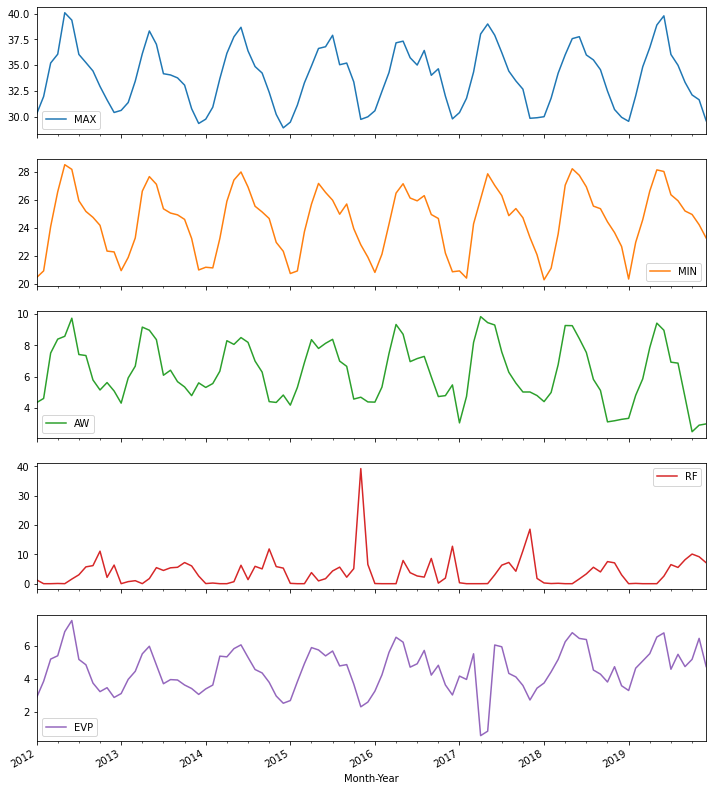

In [881]:
df[features].plot(subplots = True, figsize = (12, 15))
plt.show()

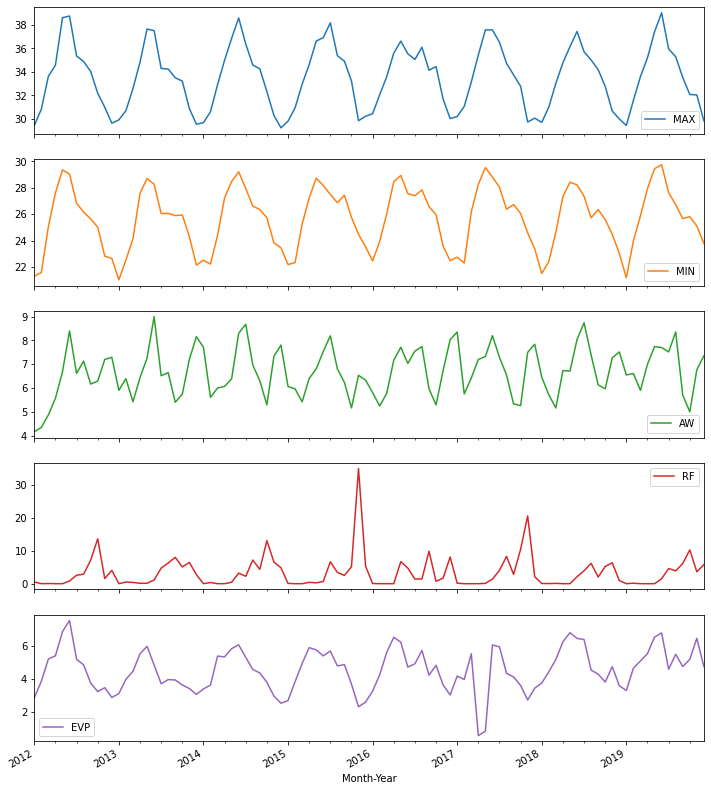

In [671]:
df01[features].plot(subplots = True, figsize = (12, 15))
plt.show()

In [672]:
df01

,AREA I,MAX,MIN,AW,RF,EVP
Month-Year,,,,,,
2012-01-01,3.00,29.432258,21.296774,4.161290,0.525806,2.867742
2012-02-01,3.17,30.827586,21.565517,4.344828,0.000000,3.858621
2012-03-01,3.25,33.632258,25.058065,4.870968,0.051613,5.200000
2012-04-01,3.23,34.573333,27.606667,5.566667,0.006667,5.400000
2012-05-01,3.51,38.612903,29.354839,6.677419,0.000000,6.854839
...,...,...,...,...,...,...
2019-08-01,4.78,35.293548,26.719355,8.354839,3.900000,5.486667
2019-09-01,4.53,33.530000,25.656667,5.700000,6.136667,4.746429
2019-10-01,4.24,32.077419,25.809677,5.000000,10.264516,5.183871


In [673]:
train_dates = pd.to_datetime(df['Month-Year'])

In [674]:
cols = list(df)[16:]

In [965]:
df_for_training = df01.astype(float)

In [966]:
df01

,AREA I,MAX,MIN,AW,RF,EVP
Month-Year,,,,,,
2012-01-01,3.00,29.432258,21.296774,4.161290,0.525806,2.867742
2012-02-01,3.17,30.827586,21.565517,4.344828,0.000000,3.858621
2012-03-01,3.25,33.632258,25.058065,4.870968,0.051613,5.200000
2012-04-01,3.23,34.573333,27.606667,5.566667,0.006667,5.400000
2012-05-01,3.51,38.612903,29.354839,6.677419,0.000000,6.854839
...,...,...,...,...,...,...
2019-08-01,4.78,35.293548,26.719355,8.354839,3.900000,5.486667
2019-09-01,4.53,33.530000,25.656667,5.700000,6.136667,4.746429
2019-10-01,4.24,32.077419,25.809677,5.000000,10.264516,5.183871


In [967]:
df_for_training

,AREA I,MAX,MIN,AW,RF,EVP
Month-Year,,,,,,
2012-01-01,3.00,29.432258,21.296774,4.161290,0.525806,2.867742
2012-02-01,3.17,30.827586,21.565517,4.344828,0.000000,3.858621
2012-03-01,3.25,33.632258,25.058065,4.870968,0.051613,5.200000
2012-04-01,3.23,34.573333,27.606667,5.566667,0.006667,5.400000
2012-05-01,3.51,38.612903,29.354839,6.677419,0.000000,6.854839
...,...,...,...,...,...,...
2019-08-01,4.78,35.293548,26.719355,8.354839,3.900000,5.486667
2019-09-01,4.53,33.530000,25.656667,5.700000,6.136667,4.746429
2019-10-01,4.24,32.077419,25.809677,5.000000,10.264516,5.183871


In [994]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [995]:
trainX = []
trainY = []

In [996]:
n_future = 1
n_past = 1

In [997]:
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1 : i + n_future, 0])

In [998]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [999]:
model = Sequential()
model.add(LSTM(3, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(LSTM(2, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [1000]:
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_202 (LSTM)              (None, 1, 3)              120       
_________________________________________________________________
lstm_203 (LSTM)              (None, 2)                 48        
_________________________________________________________________
dropout_101 (Dropout)        (None, 2)                 0         
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 3         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [1001]:
histroy = model.fit(trainX, trainY, epochs = 300, batch_size = 4, validation_split=0.1, verbose = 1)

Epoch 1/300
22/22 [==============================] - 6s 48ms/step - loss: 0.8683 - val_loss: 2.0359
Epoch 2/300
22/22 [==============================] - 0s 8ms/step - loss: 1.0387 - val_loss: 2.0463
Epoch 3/300
22/22 [==============================] - 0s 9ms/step - loss: 0.8091 - val_loss: 2.0546
Epoch 4/300
22/22 [==============================] - 0s 6ms/step - loss: 1.0902 - val_loss: 2.0633
Epoch 5/300
22/22 [==============================] - 0s 5ms/step - loss: 0.9194 - val_loss: 2.0810
Epoch 6/300
22/22 [==============================] - 0s 6ms/step - loss: 0.7907 - val_loss: 2.0899
Epoch 7/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7378 - val_loss: 2.1007
Epoch 8/300
22/22 [==============================] - 0s 5ms/step - loss: 0.8715 - val_loss: 2.1157
Epoch 9/300
22/22 [==============================] - 0s 5ms/step - loss: 0.8344 - val_loss: 2.1290
Epoch 10/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6261 - val_loss: 2.1361
Epoch 11

Epoch 83/300
22/22 [==============================] - 0s 8ms/step - loss: 0.6844 - val_loss: 0.9604
Epoch 84/300
22/22 [==============================] - 0s 9ms/step - loss: 0.8014 - val_loss: 0.9189
Epoch 85/300
22/22 [==============================] - 0s 8ms/step - loss: 0.7300 - val_loss: 0.9241
Epoch 86/300
22/22 [==============================] - 0s 8ms/step - loss: 0.7906 - val_loss: 0.9268
Epoch 87/300
22/22 [==============================] - 0s 6ms/step - loss: 0.5991 - val_loss: 0.8807
Epoch 88/300
22/22 [==============================] - 0s 6ms/step - loss: 0.8160 - val_loss: 0.8480
Epoch 89/300
22/22 [==============================] - 0s 8ms/step - loss: 0.6192 - val_loss: 0.8453
Epoch 90/300
22/22 [==============================] - 0s 8ms/step - loss: 0.5048 - val_loss: 0.8127
Epoch 91/300
22/22 [==============================] - 0s 8ms/step - loss: 0.5632 - val_loss: 0.7777
Epoch 92/300
22/22 [==============================] - 0s 13ms/step - loss: 0.7262 - val_loss: 0.7818

22/22 [==============================] - 0s 8ms/step - loss: 0.3500 - val_loss: 0.4750
Epoch 245/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6386 - val_loss: 0.5016
Epoch 246/300
22/22 [==============================] - 0s 5ms/step - loss: 0.5416 - val_loss: 0.4915
Epoch 247/300
22/22 [==============================] - 0s 6ms/step - loss: 0.4213 - val_loss: 0.4388
Epoch 248/300
22/22 [==============================] - 0s 7ms/step - loss: 0.5362 - val_loss: 0.4376
Epoch 249/300
22/22 [==============================] - ETA: 0s - loss: 0.477 - 0s 12ms/step - loss: 0.4818 - val_loss: 0.4534
Epoch 250/300
22/22 [==============================] - 0s 9ms/step - loss: 0.3953 - val_loss: 0.4730
Epoch 251/300
22/22 [==============================] - 0s 8ms/step - loss: 0.4562 - val_loss: 0.4898
Epoch 252/300
22/22 [==============================] - 0s 10ms/step - loss: 0.7732 - val_loss: 0.4825
Epoch 253/300
22/22 [==============================] - 0s 7ms/step - loss: 0.35

In [694]:
trainX.shape

(95, 1, 6)

In [695]:
df_for_training_scaled

array([[-1.09928865e+00, -1.51908322e+00, -1.88143841e+00,
        -2.44788130e+00, -5.67892682e-01, -1.29638633e+00],
       [-8.74859834e-01, -1.00277659e+00, -1.76595983e+00,
        -2.26984886e+00, -6.74951686e-01, -5.28473070e-01],
       [-7.69246273e-01,  3.50227847e-02, -2.65216338e-01,
        -1.75948920e+00, -6.64442827e-01,  5.11071829e-01],
       [-7.95649663e-01,  3.83244386e-01,  8.29915035e-01,
        -1.08465634e+00, -6.73594292e-01,  6.66068241e-01],
       [-4.26002200e-01,  1.87798720e+00,  1.58110252e+00,
        -7.21841150e-03, -6.74951686e-01,  1.79354214e+00],
       [-3.07186944e-01,  1.93241672e+00,  1.44438437e+00,
         1.66369695e+00, -5.07313487e-01,  2.31419675e+00],
       [ 4.58511374e-01,  6.72421101e-01,  4.95766436e-01,
        -6.97995112e-02, -1.50165526e-01,  4.96072177e-01],
       [ 6.82940191e-01,  4.98151149e-01,  2.06066254e-01,
         4.30849286e-01, -8.71123706e-02,  2.43578022e-01],
       [-2.27976773e-01,  1.85897592e-01, -1.659

In [696]:
forecast_dates = pd.date_range('2020-01-01', '2020-12-01', freq = 'MS').strftime("%Y-%b").tolist()

In [1002]:
n_future = 12
forecast = model.predict(trainX[-n_future:])

In [1003]:
forecast_dates

['2020-Jan',
 '2020-Feb',
 '2020-Mar',
 '2020-Apr',
 '2020-May',
 '2020-Jun',
 '2020-Jul',
 '2020-Aug',
 '2020-Sep',
 '2020-Oct',
 '2020-Nov',
 '2020-Dec']

In [1004]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [1005]:
y_pred_future

array([3.995901 , 4.4762135, 4.1725225, 4.4361186, 4.600496 , 4.880101 ,
       4.7799826, 4.4060087, 4.219528 , 3.9677794, 3.3510523, 3.741005 ],
      dtype=float32)

In [1006]:
y_pred_for_test = []
for i in range(len(y_pred_future)):
    if(i != 2 and i != 3):
        y_pred_for_test.append(y_pred_future[i])

In [1007]:
def RMSE(a,b):
    res = 0
    for i in range(len(a)):
        res += (a[i] - b[i]) ** 2
    res /= len(a)
    return math.sqrt(res)

In [1008]:
RMSE(y_pred_for_test, np.asarray(df_test['AREA I']))

0.4900270531923374

In [1009]:
df_test.columns

Index(['Month-Year', 'AREA I', 'AREA II', 'AREA III', 'AREA IV', 'AREA IX',
       'AREA V', 'AREA VI', 'AREA VII', 'AREA VIII', 'AREA X', 'AREA XI',
       'AREA XII', 'AREA XIII', 'AREA XIV', 'AREA XV'],
      dtype='object')

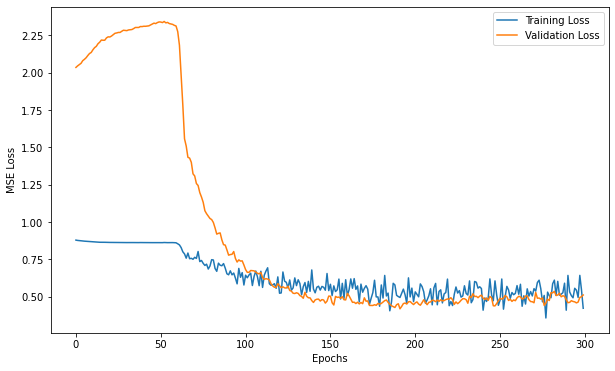

In [1010]:
plt.figure(figsize=(10,6))
plt.plot(histroy.history['loss'], label = 'Training Loss')
plt.plot(histroy.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

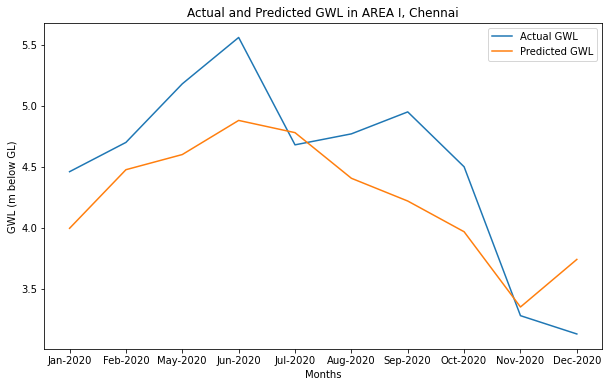

In [1011]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA I']))
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test)
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA I, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [867]:
df_for_training = df02.astype(float)

In [868]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
trainX = []
trainY = []
n_future = 1
n_past = 1
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1 : i + n_future, 0])
trainX, trainY = np.array(trainX), np.array(trainY)
model = Sequential()
model.add(LSTM(4, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(LSTM(3, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [869]:
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_190 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_191 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_95 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [870]:
history = model.fit(trainX, trainY, epochs = 150, batch_size = 8, validation_split=0.1, verbose = 1)

Epoch 1/150
11/11 [==============================] - 5s 69ms/step - loss: 0.7265 - val_loss: 2.9300
Epoch 2/150
11/11 [==============================] - 0s 7ms/step - loss: 0.7345 - val_loss: 2.9449
Epoch 3/150
11/11 [==============================] - 0s 8ms/step - loss: 0.9286 - val_loss: 2.9633
Epoch 4/150
11/11 [==============================] - 0s 8ms/step - loss: 0.5867 - val_loss: 2.9704
Epoch 5/150
11/11 [==============================] - 0s 8ms/step - loss: 0.6807 - val_loss: 2.9820
Epoch 6/150
11/11 [==============================] - 0s 8ms/step - loss: 0.9374 - val_loss: 2.9977
Epoch 7/150
11/11 [==============================] - 0s 8ms/step - loss: 0.7108 - val_loss: 3.0086
Epoch 8/150
11/11 [==============================] - 0s 8ms/step - loss: 0.9802 - val_loss: 3.0120
Epoch 9/150
11/11 [==============================] - 0s 8ms/step - loss: 0.6503 - val_loss: 3.0221
Epoch 10/150
11/11 [==============================] - 0s 8ms/step - loss: 0.8123 - val_loss: 3.0333
Epoch 11

In [871]:
n_future = 12
forecast = model.predict(trainX[-n_future:])

In [872]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [873]:
y_pred_for_test = []
for i in range(len(y_pred_future)):
    if(i != 2 and i != 3):
        y_pred_for_test.append(y_pred_future[i])

In [874]:
y_pred_for_test

[4.0856957,
 4.61356,
 4.7911887,
 5.5669,
 5.3364353,
 5.1037745,
 5.0951867,
 3.9850905,
 2.7802026,
 3.5705101]

In [879]:
df_test['AREA II']

96     3.97
97     4.23
98     5.26
99     5.69
100    4.38
101    4.40
102    4.19
103    3.64
104    2.37
105    2.25
Name: AREA II, dtype: float64

In [929]:
RMSE(y_pred_for_test, np.asarray(df_test['AREA II']))

0.6823468638574202

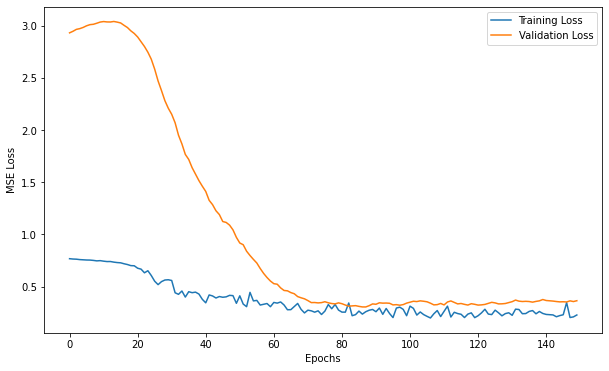

In [876]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

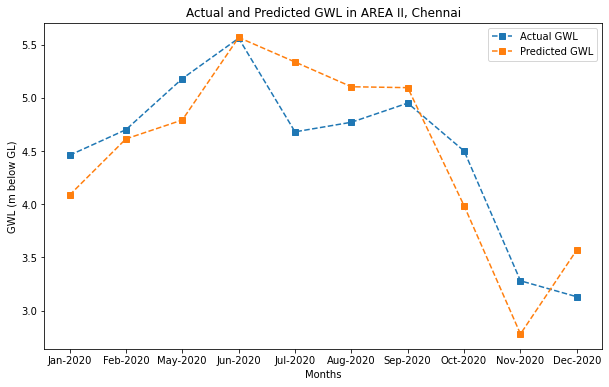

In [892]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA I']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA II, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1012]:
## AREA I
df_for_training_01 = df01.astype(float)
scaler_01 = StandardScaler()
scaler_01 = scaler.fit(df_for_training_01)
df_for_training_scaled_01 = scaler.transform(df_for_training_01)
trainX_01 = []
trainY_01 = []
n_future_01 = 1
n_past_01 = 1
for i in range(n_past_01, len(df_for_training_scaled_01) - n_future_01 + 1):
    trainX_01.append(df_for_training_scaled_01[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_01.append(df_for_training_scaled_01[i + n_future_01 - 1 : i + n_future_01, 0])
trainX_01, trainY_01 = np.array(trainX_01), np.array(trainY_01)
model_01 = Sequential()
model_01.add(LSTM(4, activation = 'relu', input_shape = (trainX_01.shape[1], trainX_01.shape[2]), return_sequences = True))
model_01.add(LSTM(3, activation = 'relu', return_sequences = False))
model_01.add(Dropout(0.2))
model_01.add(Dense(trainY_01.shape[1]))

In [1013]:
model_01.compile(optimizer = 'adam', loss = 'mse')
model_01.summary()

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_204 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_205 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_102 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [1014]:
history_01 = model_01.fit(trainX_01, trainY_01, epochs = 300, batch_size = 4, validation_split=0.1, verbose = 1)

Epoch 1/300
22/22 [==============================] - 7s 41ms/step - loss: 0.8802 - val_loss: 1.9797
Epoch 2/300
22/22 [==============================] - 0s 7ms/step - loss: 0.9478 - val_loss: 1.9841
Epoch 3/300
22/22 [==============================] - 0s 6ms/step - loss: 1.0390 - val_loss: 1.9905
Epoch 4/300
22/22 [==============================] - 0s 5ms/step - loss: 0.8046 - val_loss: 1.9780
Epoch 5/300
22/22 [==============================] - 0s 5ms/step - loss: 1.0092 - val_loss: 1.9608
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7561 - val_loss: 1.9367
Epoch 7/300
22/22 [==============================] - 0s 5ms/step - loss: 0.8189 - val_loss: 1.9170
Epoch 8/300
22/22 [==============================] - 0s 6ms/step - loss: 0.7834 - val_loss: 1.8582
Epoch 9/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6967 - val_loss: 1.7968
Epoch 10/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6484 - val_loss: 1.7724
Epoch 11

Epoch 83/300
22/22 [==============================] - 0s 8ms/step - loss: 0.4191 - val_loss: 0.3550
Epoch 84/300
22/22 [==============================] - 0s 7ms/step - loss: 0.4959 - val_loss: 0.3501
Epoch 85/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3174 - val_loss: 0.3365
Epoch 86/300
22/22 [==============================] - 0s 8ms/step - loss: 0.2106 - val_loss: 0.3437
Epoch 87/300
22/22 [==============================] - 0s 10ms/step - loss: 0.5243 - val_loss: 0.3323
Epoch 88/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3240 - val_loss: 0.3373
Epoch 89/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3823 - val_loss: 0.3324
Epoch 90/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3446 - val_loss: 0.3224
Epoch 91/300
22/22 [==============================] - 0s 7ms/step - loss: 0.2828 - val_loss: 0.3155
Epoch 92/300
22/22 [==============================] - 0s 9ms/step - loss: 0.3199 - val_loss: 0.3187

Epoch 164/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3927 - val_loss: 0.2518
Epoch 165/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3542 - val_loss: 0.2453
Epoch 166/300
22/22 [==============================] - 0s 9ms/step - loss: 0.3024 - val_loss: 0.2534
Epoch 167/300
22/22 [==============================] - 0s 10ms/step - loss: 0.4414 - val_loss: 0.2415
Epoch 168/300
22/22 [==============================] - 0s 7ms/step - loss: 0.5628 - val_loss: 0.2475
Epoch 169/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3780 - val_loss: 0.2510
Epoch 170/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3708 - val_loss: 0.2456
Epoch 171/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3442 - val_loss: 0.2441
Epoch 172/300
22/22 [==============================] - 0s 6ms/step - loss: 0.3580 - val_loss: 0.2375
Epoch 173/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2537 - val_lo

22/22 [==============================] - 0s 5ms/step - loss: 0.4029 - val_loss: 0.1528
Epoch 246/300
22/22 [==============================] - 0s 6ms/step - loss: 0.4176 - val_loss: 0.1455
Epoch 247/300
22/22 [==============================] - 0s 5ms/step - loss: 0.5661 - val_loss: 0.1461
Epoch 248/300
22/22 [==============================] - 0s 6ms/step - loss: 0.3595 - val_loss: 0.1507
Epoch 249/300
22/22 [==============================] - 0s 6ms/step - loss: 0.3048 - val_loss: 0.1619
Epoch 250/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3329 - val_loss: 0.1603
Epoch 251/300
22/22 [==============================] - 0s 7ms/step - loss: 0.2478 - val_loss: 0.1625
Epoch 252/300
22/22 [==============================] - 0s 7ms/step - loss: 0.2794 - val_loss: 0.1624
Epoch 253/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3097 - val_loss: 0.1585
Epoch 254/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3171 - val_loss: 0.1535
Epoc

In [1023]:
n_future_01 = 12
forecast_01 = model_01.predict(trainX_01[-n_future_01:])
forecast_copies_01 = np.repeat(forecast_01, df_for_training_01.shape[1], axis = 1)
y_pred_future_01 = scaler_01.inverse_transform(forecast_copies_01)[:,0]
y_pred_for_test_01 = []
for i in range(len(y_pred_future_01)):
    if(i != 2 and i != 3):
        y_pred_for_test_01.append(y_pred_future_01[i])

In [1024]:
rmse_01 = RMSE(y_pred_for_test_01, np.asarray(df_test['AREA I']))
print(rmse_01)

0.3065593607044889


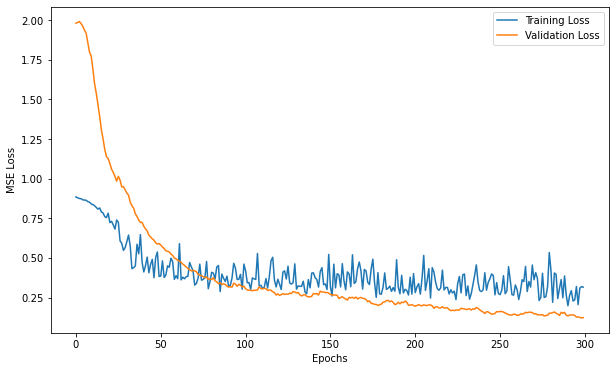

In [1025]:
plt.figure(figsize=(10,6))
plt.plot(history_01.history['loss'], label = 'Training Loss')
plt.plot(history_01.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

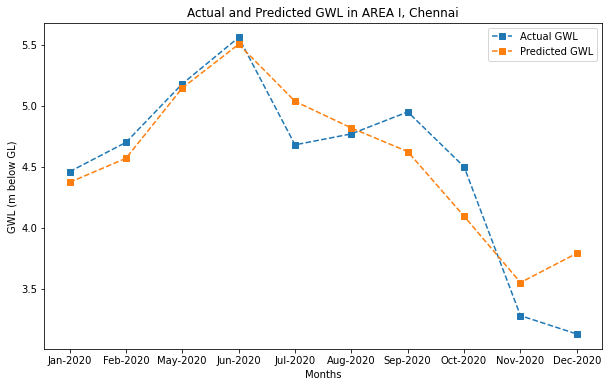

In [1026]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA I']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_01, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA I, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1089]:
## AREA II
df_for_training_02 = df02.astype(float)
scaler_02 = StandardScaler()
scaler_02 = scaler.fit(df_for_training_02)
df_for_training_scaled_02 = scaler.transform(df_for_training_02)
trainX_02 = []
trainY_02 = []
n_future_02 = 1
n_past_02 = 1
for i in range(n_past_02, len(df_for_training_scaled_02) - n_future_02 + 1):
    trainX_02.append(df_for_training_scaled_02[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_02.append(df_for_training_scaled_02[i + n_future_02 - 1 : i + n_future_02, 0])
trainX_02, trainY_02 = np.array(trainX_02), np.array(trainY_02)
model_02 = Sequential()
model_02.add(LSTM(4, activation = 'relu', input_shape = (trainX_02.shape[1], trainX_02.shape[2]), return_sequences = True))
model_02.add(LSTM(3, activation = 'relu', return_sequences = False))
model_02.add(Dropout(0.2))
model_02.add(Dense(trainY_02.shape[1]))

In [1090]:
model_02.compile(optimizer = 'adam', loss = 'mse')
model_02.summary()

Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_230 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_231 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_115 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [1091]:
history_02 = model_02.fit(trainX_02, trainY_02, epochs = 200, batch_size = 4, validation_split=0.1, verbose = 1)

Epoch 1/200
22/22 [==============================] - 6s 30ms/step - loss: 0.6410 - val_loss: 2.9262
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5773 - val_loss: 2.9598
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.8151 - val_loss: 2.9792
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.7396 - val_loss: 3.0097
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.8598 - val_loss: 3.0185
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6084 - val_loss: 3.0343
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9017 - val_loss: 3.0562
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 0.8435 - val_loss: 3.0665
Epoch 9/200
22/22 [==============================] - 0s 8ms/step - loss: 0.6026 - val_loss: 3.0805
Epoch 10/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7939 - val_loss: 3.1019
Epoch 11

Epoch 83/200
22/22 [==============================] - 0s 8ms/step - loss: 0.4167 - val_loss: 0.4376
Epoch 84/200
22/22 [==============================] - 0s 10ms/step - loss: 0.2342 - val_loss: 0.4670
Epoch 85/200
22/22 [==============================] - 0s 7ms/step - loss: 0.2072 - val_loss: 0.4569
Epoch 86/200
22/22 [==============================] - 0s 8ms/step - loss: 0.5001 - val_loss: 0.4462
Epoch 87/200
22/22 [==============================] - 0s 8ms/step - loss: 0.2159 - val_loss: 0.4227
Epoch 88/200
22/22 [==============================] - 0s 11ms/step - loss: 0.2550 - val_loss: 0.4176
Epoch 89/200
22/22 [==============================] - 0s 9ms/step - loss: 0.2341 - val_loss: 0.4340
Epoch 90/200
22/22 [==============================] - 0s 5ms/step - loss: 0.2168 - val_loss: 0.4461
Epoch 91/200
22/22 [==============================] - 0s 5ms/step - loss: 0.4040 - val_loss: 0.4215
Epoch 92/200
22/22 [==============================] - 0s 5ms/step - loss: 0.2074 - val_loss: 0.429

In [1092]:
n_future_02 = 12
forecast_02 = model_02.predict(trainX_02[-n_future_02:])
forecast_copies_02 = np.repeat(forecast_02, df_for_training_02.shape[1], axis = 1)
y_pred_future_02 = scaler_02.inverse_transform(forecast_copies_02)[:,0]
y_pred_for_test_02 = []
for i in range(len(y_pred_future_02)):
    if(i != 2 and i != 3):
        y_pred_for_test_02.append(y_pred_future_02[i])

In [1123]:
rmse_02 = RMSE(y_pred_for_test_02, np.asarray(df_test['AREA II']))
print(rmse_02)

0.7389841035192883


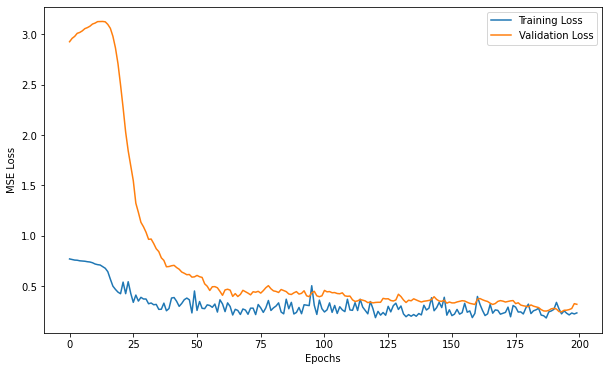

In [1094]:
plt.figure(figsize=(10,6))
plt.plot(history_02.history['loss'], label = 'Training Loss')
plt.plot(history_02.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

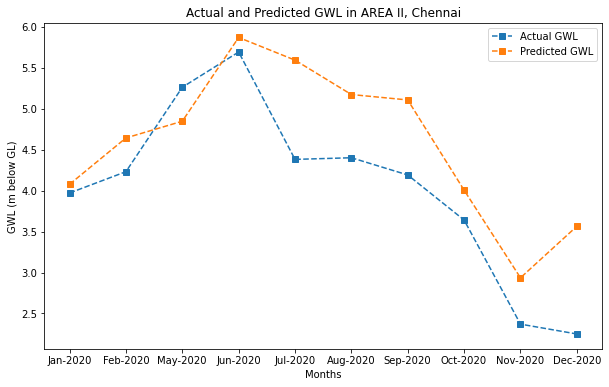

In [1095]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA II']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_02, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA II, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1170]:
## AREA III
df_for_training_03 = df03.astype(float)
scaler_03 = StandardScaler()
scaler_03 = scaler.fit(df_for_training_03)
df_for_training_scaled_03 = scaler.transform(df_for_training_03)
trainX_03 = []
trainY_03 = []
n_future_03 = 1
n_past_03 = 1
for i in range(n_past_03, len(df_for_training_scaled_03) - n_future_03 + 1):
    trainX_03.append(df_for_training_scaled_03[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_03.append(df_for_training_scaled_03[i + n_future_03 - 1 : i + n_future_03, 0])
trainX_03, trainY_03 = np.array(trainX_03), np.array(trainY_03)
model_03 = Sequential()
model_03.add(LSTM(3, activation = 'relu', input_shape = (trainX_03.shape[1], trainX_03.shape[2]), return_sequences = True))
model_03.add(LSTM(3, activation = 'relu', return_sequences = False))
model_03.add(Dropout(0.2))
model_03.add(Dense(trainY_03.shape[1]))

In [1171]:
model_03.compile(optimizer = 'adam', loss = 'mse')
model_03.summary()

Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_258 (LSTM)              (None, 1, 3)              120       
_________________________________________________________________
lstm_259 (LSTM)              (None, 3)                 84        
_________________________________________________________________
dropout_129 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 4         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [1172]:
history_03 = model_03.fit(trainX_03, trainY_03, epochs = 200, batch_size = 4, validation_split=0.1, verbose = 1)

Epoch 1/200
22/22 [==============================] - 5s 34ms/step - loss: 0.8544 - val_loss: 2.4455
Epoch 2/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7015 - val_loss: 2.4449
Epoch 3/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7403 - val_loss: 2.4383
Epoch 4/200
22/22 [==============================] - 0s 8ms/step - loss: 0.6147 - val_loss: 2.4339
Epoch 5/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7612 - val_loss: 2.4015
Epoch 6/200
22/22 [==============================] - 0s 6ms/step - loss: 0.8864 - val_loss: 2.3511
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.7280 - val_loss: 2.3235
Epoch 8/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7477 - val_loss: 2.2503
Epoch 9/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7014 - val_loss: 2.1697
Epoch 10/200
22/22 [==============================] - 0s 6ms/step - loss: 0.6649 - val_loss: 2.0578
Epoch 11

Epoch 83/200
22/22 [==============================] - 0s 5ms/step - loss: 0.4625 - val_loss: 0.3009
Epoch 84/200
22/22 [==============================] - 0s 5ms/step - loss: 0.4479 - val_loss: 0.3130
Epoch 85/200
22/22 [==============================] - 0s 8ms/step - loss: 0.5014 - val_loss: 0.3180
Epoch 86/200
22/22 [==============================] - 0s 6ms/step - loss: 0.4342 - val_loss: 0.3053
Epoch 87/200
22/22 [==============================] - 0s 6ms/step - loss: 0.3337 - val_loss: 0.2995
Epoch 88/200
22/22 [==============================] - 0s 8ms/step - loss: 0.4738 - val_loss: 0.2972
Epoch 89/200
22/22 [==============================] - 0s 9ms/step - loss: 0.3935 - val_loss: 0.3006
Epoch 90/200
22/22 [==============================] - 0s 8ms/step - loss: 0.5385 - val_loss: 0.3060
Epoch 91/200
22/22 [==============================] - 0s 11ms/step - loss: 0.5026 - val_loss: 0.3000
Epoch 92/200
22/22 [==============================] - 0s 8ms/step - loss: 0.4805 - val_loss: 0.2922

In [1173]:
n_future_03 = 12
forecast_03 = model_03.predict(trainX_03[-n_future_03:])
forecast_copies_03 = np.repeat(forecast_03, df_for_training_03.shape[1], axis = 1)
y_pred_future_03 = scaler_03.inverse_transform(forecast_copies_03)[:,0]
y_pred_for_test_03 = []
for i in range(len(y_pred_future_03)):
    if(i != 2 and i != 3):
        y_pred_for_test_03.append(y_pred_future_03[i])

In [1174]:
rmse_03 = RMSE(y_pred_for_test_03, np.asarray(df_test['AREA III']))
print(rmse_03)

0.4849987042000387


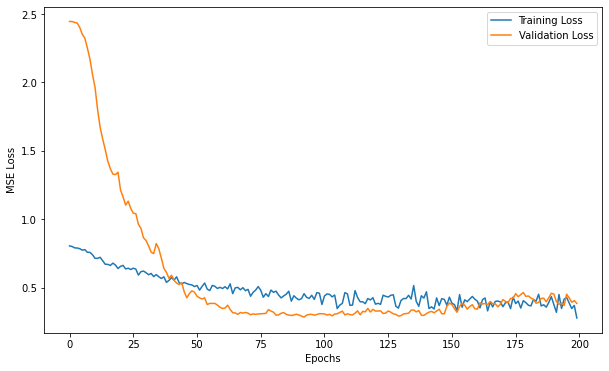

In [1175]:
plt.figure(figsize=(10,6))
plt.plot(history_03.history['loss'], label = 'Training Loss')
plt.plot(history_03.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

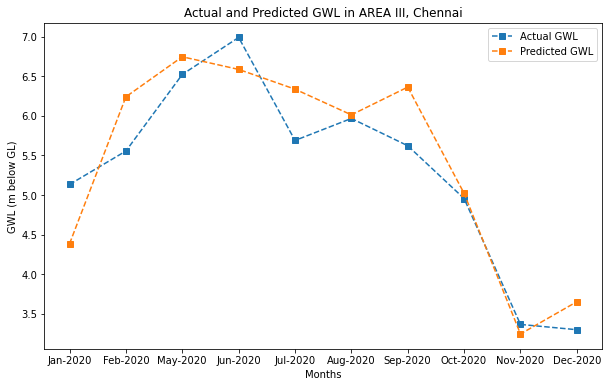

In [1176]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA III']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_03, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA III, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1154]:
## AREA IV
df_for_training_04 = df04.astype(float)
scaler_04 = StandardScaler()
scaler_04 = scaler.fit(df_for_training_04)
df_for_training_scaled_04 = scaler.transform(df_for_training_04)
trainX_04 = []
trainY_04 = []
n_future_04 = 1
n_past_04 = 1
for i in range(n_past_04, len(df_for_training_scaled_04) - n_future_04 + 1):
    trainX_04.append(df_for_training_scaled_04[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_04.append(df_for_training_scaled_04[i + n_future_04 - 1 : i + n_future_04, 0])
trainX_04, trainY_04 = np.array(trainX_04), np.array(trainY_04)
model_04 = Sequential()
model_04.add(LSTM(4, activation = 'relu', input_shape = (trainX_04.shape[1], trainX_04.shape[2]), return_sequences = True))
model_04.add(LSTM(3, activation = 'relu', return_sequences = False))
model_04.add(Dropout(0.2))
model_04.add(Dense(trainY_04.shape[1]))

In [1155]:
model_04.compile(optimizer = 'adam', loss = 'mse')
model_04.summary()

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_250 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_251 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_125 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [1156]:
history_04 = model_04.fit(trainX_04, trainY_04, epochs = 150, batch_size = 4, validation_split=0.1, verbose = 1)

Epoch 1/150
22/22 [==============================] - 5s 39ms/step - loss: 0.6420 - val_loss: 2.9885
Epoch 2/150
22/22 [==============================] - 0s 6ms/step - loss: 0.9898 - val_loss: 3.0064
Epoch 3/150
22/22 [==============================] - 0s 6ms/step - loss: 0.6598 - val_loss: 3.0174
Epoch 4/150
22/22 [==============================] - 0s 6ms/step - loss: 0.7283 - val_loss: 3.0124
Epoch 5/150
22/22 [==============================] - 0s 8ms/step - loss: 0.8294 - val_loss: 3.0235
Epoch 6/150
22/22 [==============================] - 0s 6ms/step - loss: 0.8060 - val_loss: 3.0346
Epoch 7/150
22/22 [==============================] - 0s 6ms/step - loss: 0.9329 - val_loss: 3.0416
Epoch 8/150
22/22 [==============================] - 0s 6ms/step - loss: 0.5221 - val_loss: 3.0533
Epoch 9/150
22/22 [==============================] - 0s 6ms/step - loss: 0.5604 - val_loss: 3.0528
Epoch 10/150
22/22 [==============================] - 0s 6ms/step - loss: 0.8316 - val_loss: 3.0396
Epoch 11

Epoch 83/150
22/22 [==============================] - 0s 9ms/step - loss: 0.2191 - val_loss: 0.2769
Epoch 84/150
22/22 [==============================] - 0s 10ms/step - loss: 0.2058 - val_loss: 0.2549
Epoch 85/150
22/22 [==============================] - 0s 9ms/step - loss: 0.1807 - val_loss: 0.2575
Epoch 86/150
22/22 [==============================] - 0s 9ms/step - loss: 0.1669 - val_loss: 0.2531
Epoch 87/150
22/22 [==============================] - 0s 12ms/step - loss: 0.2082 - val_loss: 0.2521
Epoch 88/150
22/22 [==============================] - 0s 9ms/step - loss: 0.2006 - val_loss: 0.2629
Epoch 89/150
22/22 [==============================] - 0s 10ms/step - loss: 0.2195 - val_loss: 0.2696
Epoch 90/150
22/22 [==============================] - 0s 8ms/step - loss: 0.1602 - val_loss: 0.2643
Epoch 91/150
22/22 [==============================] - 0s 10ms/step - loss: 0.2005 - val_loss: 0.2477
Epoch 92/150
22/22 [==============================] - 0s 14ms/step - loss: 0.1839 - val_loss: 0.

In [1157]:
n_future_04 = 12
forecast_04 = model_04.predict(trainX_04[-n_future_04:])
forecast_copies_04 = np.repeat(forecast_04, df_for_training_04.shape[1], axis = 1)
y_pred_future_04 = scaler_04.inverse_transform(forecast_copies_04)[:,0]
y_pred_for_test_04 = []
for i in range(len(y_pred_future_04)):
    if(i != 2 and i != 3):
        y_pred_for_test_04.append(y_pred_future_04[i])

In [1158]:
rmse_04 =  RMSE(y_pred_for_test_04, np.asarray(df_test['AREA IV']))
print(rmse_04)

0.7798504805387662


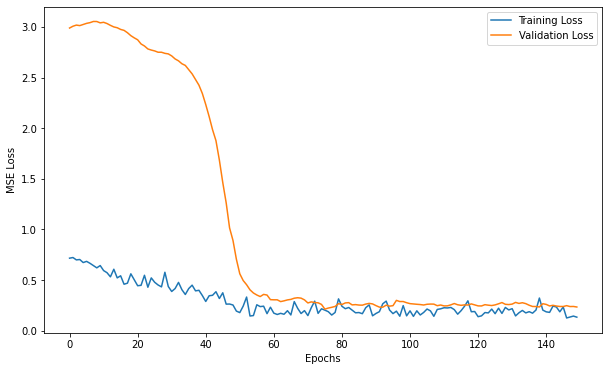

In [1159]:
plt.figure(figsize=(10,6))
plt.plot(history_04.history['loss'], label = 'Training Loss')
plt.plot(history_04.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

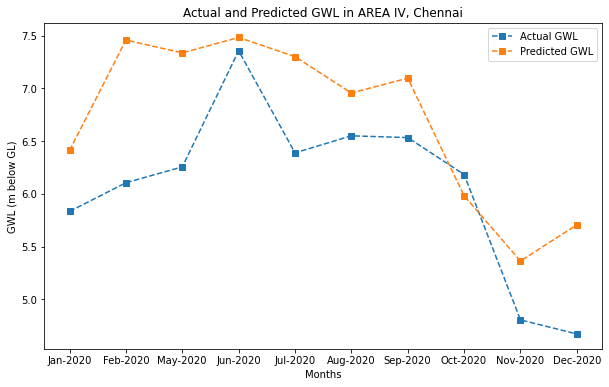

In [1160]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA IV']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_04, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA IV, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1177]:
## AREA V
df_for_training_05 = df05.astype(float)
scaler_05 = StandardScaler()
scaler_05 = scaler.fit(df_for_training_05)
df_for_training_scaled_05 = scaler.transform(df_for_training_05)
trainX_05 = []
trainY_05 = []
n_future_05 = 1
n_past_05 = 1
for i in range(n_past_05, len(df_for_training_scaled_05) - n_future_05 + 1):
    trainX_05.append(df_for_training_scaled_05[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_05.append(df_for_training_scaled_05[i + n_future_05 - 1 : i + n_future_05, 0])
trainX_05, trainY_05 = np.array(trainX_05), np.array(trainY_05)
model_05 = Sequential()
model_05.add(LSTM(4, activation = 'relu', input_shape = (trainX_05.shape[1], trainX_05.shape[2]), return_sequences = True))
model_05.add(LSTM(3, activation = 'relu', return_sequences = False))
model_05.add(Dropout(0.2))
model_05.add(Dense(trainY_05.shape[1]))

Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_260 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_261 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_130 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/200
11/11 [==============================] - 5s 65ms/step - loss: 0.7932 - val_loss: 2.6489
Epoch 2/200
11/11 [==============================] - 0s 9ms/step - loss: 0.7324 - val_loss: 2.6564
Epoch 3/200
11/11 [============================

Epoch 154/200
11/11 [==============================] - 0s 21ms/step - loss: 0.2186 - val_loss: 0.3525
Epoch 155/200
11/11 [==============================] - 0s 13ms/step - loss: 0.3224 - val_loss: 0.3492
Epoch 156/200
11/11 [==============================] - 0s 15ms/step - loss: 0.1872 - val_loss: 0.3555
Epoch 157/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2238 - val_loss: 0.3547
Epoch 158/200
11/11 [==============================] - 0s 14ms/step - loss: 0.1453 - val_loss: 0.3542
Epoch 159/200
11/11 [==============================] - 0s 15ms/step - loss: 0.3301 - val_loss: 0.3546
Epoch 160/200
11/11 [==============================] - 0s 14ms/step - loss: 0.1825 - val_loss: 0.3538
Epoch 161/200
11/11 [==============================] - 0s 21ms/step - loss: 0.2884 - val_loss: 0.3607
Epoch 162/200
11/11 [==============================] - 0s 11ms/step - loss: 0.2351 - val_loss: 0.3489
Epoch 163/200
11/11 [==============================] - 0s 12ms/step - loss: 0.2173

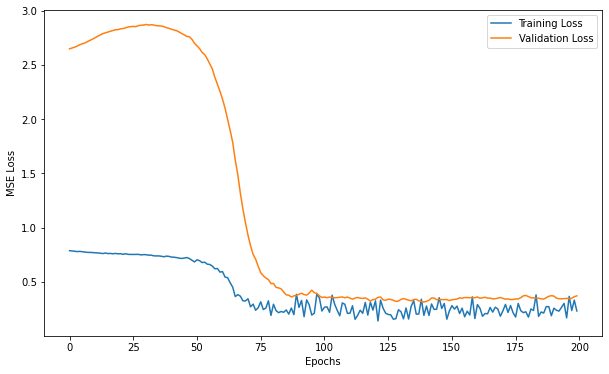

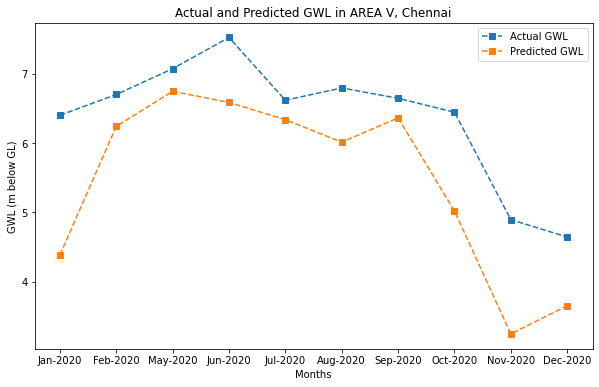

In [1178]:
model_05.compile(optimizer = 'adam', loss = 'mse')
print(model_05.summary())
print()

history_05 = model_05.fit(trainX_05, trainY_05, epochs = 200, batch_size = 8, validation_split=0.1, verbose = 1)

n_future_05 = 12
forecast_05 = model_05.predict(trainX_05[-n_future_05:])
forecast_copies_05 = np.repeat(forecast_05, df_for_training_05.shape[1], axis = 1)
y_pred_future_05 = scaler_05.inverse_transform(forecast_copies_05)[:,0]
y_pred_for_test_05 = []
for i in range(len(y_pred_future_05)):
    if(i != 2 and i != 3):
        y_pred_for_test_05.append(y_pred_future_05[i])

rmse_05 =  RMSE(y_pred_for_test_05, np.asarray(df_test['AREA V']))
print('RMSE LOSS:', rmse_05)

plt.figure(figsize=(10,6))
plt.plot(history_05.history['loss'], label = 'Training Loss')
plt.plot(history_05.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA V']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_03, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA V, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1205]:
## AREA VI
df_for_training_06 = df06.astype(float)
scaler_06 = StandardScaler()
scaler_06 = scaler.fit(df_for_training_06)
df_for_training_scaled_06 = scaler.transform(df_for_training_06)
trainX_06 = []
trainY_06 = []
n_future_06 = 1
n_past_06 = 1
for i in range(n_past_06, len(df_for_training_scaled_06) - n_future_06 + 1):
    trainX_06.append(df_for_training_scaled_06[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_06.append(df_for_training_scaled_06[i + n_future_06 - 1 : i + n_future_06, 0])
trainX_06, trainY_06 = np.array(trainX_06), np.array(trainY_06)
model_06 = Sequential()
model_06.add(LSTM(4, activation = 'relu', input_shape = (trainX_06.shape[1], trainX_06.shape[2]), return_sequences = True))
model_06.add(LSTM(3, activation = 'relu', return_sequences = False))
model_06.add(Dropout(0.2))
model_06.add(Dense(trainY_06.shape[1]))

Model: "sequential_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_288 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_289 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_144 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/100
22/22 [==============================] - 6s 36ms/step - loss: 0.5933 - val_loss: 3.5137
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6461 - val_loss: 3.5091
Epoch 3/100
22/22 [============================

Epoch 74/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2232 - val_loss: 0.5229
Epoch 75/100
22/22 [==============================] - 0s 9ms/step - loss: 0.1920 - val_loss: 0.5327
Epoch 76/100
22/22 [==============================] - 0s 7ms/step - loss: 0.1954 - val_loss: 0.5385
Epoch 77/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1680 - val_loss: 0.5206
Epoch 78/100
22/22 [==============================] - 0s 15ms/step - loss: 0.1722 - val_loss: 0.5296
Epoch 79/100
22/22 [==============================] - 0s 10ms/step - loss: 0.2283 - val_loss: 0.5256
Epoch 80/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2202 - val_loss: 0.5233
Epoch 81/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1877 - val_loss: 0.5378
Epoch 82/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2418 - val_loss: 0.5672
Epoch 83/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2077 - val_loss: 0.562

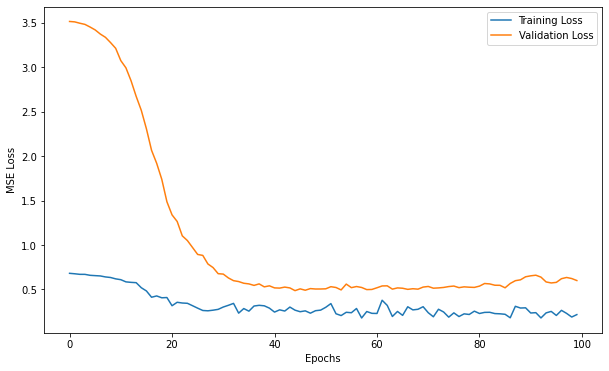

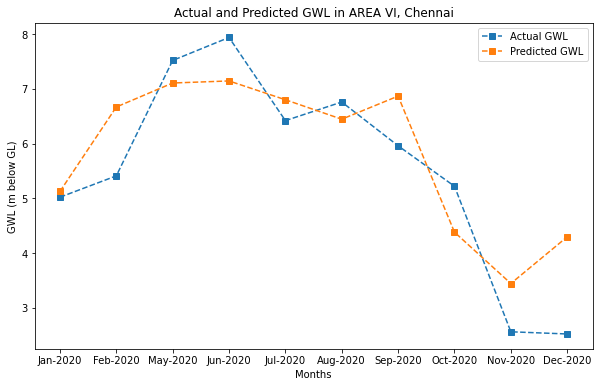

In [1206]:
model_06.compile(optimizer = 'adam', loss = 'mse')
print(model_06.summary())
print()

history_06 = model_06.fit(trainX_06, trainY_06, epochs = 100, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_06 = 12
forecast_06 = model_06.predict(trainX_06[-n_future_06:])
forecast_copies_06 = np.repeat(forecast_06, df_for_training_06.shape[1], axis = 1)
y_pred_future_06 = scaler_06.inverse_transform(forecast_copies_06)[:,0]
y_pred_for_test_06 = []
for i in range(len(y_pred_future_06)):
    if(i != 2 and i != 3):
        y_pred_for_test_06.append(y_pred_future_06[i])

rmse_06 =  RMSE(y_pred_for_test_06, np.asarray(df_test['AREA VI']))
print('RMSE LOSS:', rmse_06)

plt.figure(figsize=(10,6))
plt.plot(history_06.history['loss'], label = 'Training Loss')
plt.plot(history_06.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA VI']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_06, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA VI, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1223]:
## AREA VII
df_for_training_07 = df07.astype(float)
scaler_07 = StandardScaler()
scaler_07 = scaler.fit(df_for_training_07)
df_for_training_scaled_07 = scaler.transform(df_for_training_07)
trainX_07 = []
trainY_07 = []
n_future_07 = 1
n_past_07 = 1
for i in range(n_past_07, len(df_for_training_scaled_07) - n_future_07 + 1):
    trainX_07.append(df_for_training_scaled_07[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_07.append(df_for_training_scaled_07[i + n_future_07 - 1 : i + n_future_07, 0])
trainX_07, trainY_07 = np.array(trainX_07), np.array(trainY_07)
model_07 = Sequential()
model_07.add(LSTM(4, activation = 'relu', input_shape = (trainX_07.shape[1], trainX_07.shape[2]), return_sequences = True))
model_07.add(LSTM(3, activation = 'relu', return_sequences = False))
model_07.add(Dropout(0.2))
model_07.add(Dense(trainY_07.shape[1]))

Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_306 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_307 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_153 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/300
22/22 [==============================] - 4s 32ms/step - loss: 0.6781 - val_loss: 2.5637
Epoch 2/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6098 - val_loss: 2.5302
Epoch 3/300
22/22 [============================

22/22 [==============================] - 0s 9ms/step - loss: 0.3640 - val_loss: 0.3341
Epoch 75/300
22/22 [==============================] - 0s 10ms/step - loss: 0.3685 - val_loss: 0.3158
Epoch 76/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3284 - val_loss: 0.3178
Epoch 77/300
22/22 [==============================] - 0s 8ms/step - loss: 0.4385 - val_loss: 0.3881
Epoch 78/300
22/22 [==============================] - 0s 8ms/step - loss: 0.4677 - val_loss: 0.3384
Epoch 79/300
22/22 [==============================] - 0s 10ms/step - loss: 0.3444 - val_loss: 0.2950
Epoch 80/300
22/22 [==============================] - 0s 10ms/step - loss: 0.3823 - val_loss: 0.2990
Epoch 81/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3326 - val_loss: 0.2960
Epoch 82/300
22/22 [==============================] - 0s 8ms/step - loss: 0.4957 - val_loss: 0.2968
Epoch 83/300
22/22 [==============================] - 0s 8ms/step - loss: 0.2662 - val_loss: 0.2936
Epoch 84/3

22/22 [==============================] - 0s 6ms/step - loss: 0.2476 - val_loss: 0.2723
Epoch 237/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2617 - val_loss: 0.3217
Epoch 238/300
22/22 [==============================] - 0s 5ms/step - loss: 0.3004 - val_loss: 0.2850
Epoch 239/300
22/22 [==============================] - 0s 5ms/step - loss: 0.3523 - val_loss: 0.2778
Epoch 240/300
22/22 [==============================] - 0s 5ms/step - loss: 0.3044 - val_loss: 0.2879
Epoch 241/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1830 - val_loss: 0.3408
Epoch 242/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2159 - val_loss: 0.3133
Epoch 243/300
22/22 [==============================] - 0s 6ms/step - loss: 0.4725 - val_loss: 0.2686
Epoch 244/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2832 - val_loss: 0.3242
Epoch 245/300
22/22 [==============================] - 0s 6ms/step - loss: 0.3039 - val_loss: 0.3684
Epoc

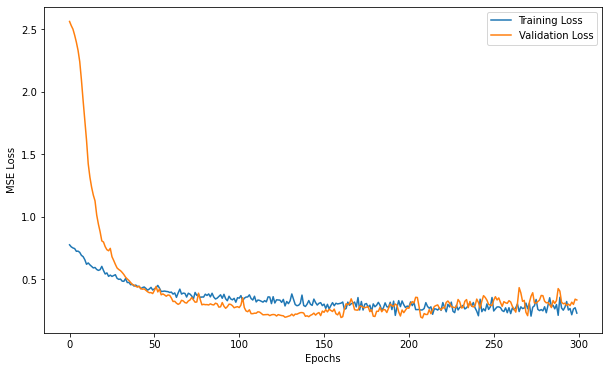

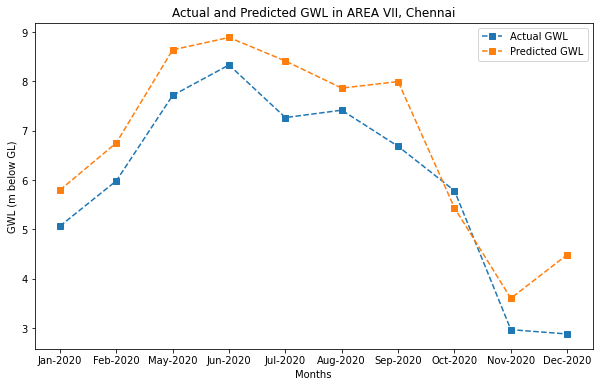

In [1224]:
model_07.compile(optimizer = 'adam', loss = 'mse')
print(model_07.summary())
print()

history_07 = model_07.fit(trainX_07, trainY_07, epochs = 300, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_07 = 12
forecast_07 = model_07.predict(trainX_07[-n_future_07:])
forecast_copies_07 = np.repeat(forecast_07, df_for_training_07.shape[1], axis = 1)
y_pred_future_07 = scaler_07.inverse_transform(forecast_copies_07)[:,0]
y_pred_for_test_07 = []
for i in range(len(y_pred_future_07)):
    if(i != 2 and i != 3):
        y_pred_for_test_07.append(y_pred_future_07[i])

rmse_07 =  RMSE(y_pred_for_test_07, np.asarray(df_test['AREA VII']))
print('RMSE LOSS:', rmse_07)

plt.figure(figsize=(10,6))
plt.plot(history_07.history['loss'], label = 'Training Loss')
plt.plot(history_07.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA VII']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_07, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA VII, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1253]:
## AREA VIII
df_for_training_08 = df08.astype(float)
scaler_08 = StandardScaler()
scaler_08 = scaler.fit(df_for_training_08)
df_for_training_scaled_08 = scaler.transform(df_for_training_08)
trainX_08 = []
trainY_08 = []
n_future_08 = 1
n_past_08 = 1
for i in range(n_past_08, len(df_for_training_scaled_08) - n_future_08 + 1):
    trainX_08.append(df_for_training_scaled_08[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_08.append(df_for_training_scaled_08[i + n_future_08 - 1 : i + n_future_08, 0])
trainX_08, trainY_08 = np.array(trainX_08), np.array(trainY_08)
model_08 = Sequential()
model_08.add(LSTM(4, activation = 'relu', input_shape = (trainX_08.shape[1], trainX_08.shape[2]), return_sequences = True))
model_08.add(LSTM(2, activation = 'relu', return_sequences = False))
model_08.add(Dropout(0.2))
model_08.add(Dense(trainY_08.shape[1]))

Model: "sequential_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_336 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_337 (LSTM)              (None, 2)                 56        
_________________________________________________________________
dropout_168 (Dropout)        (None, 2)                 0         
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 3         
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/200
22/22 [==============================] - 5s 36ms/step - loss: 1.0099 - val_loss: 2.4628
Epoch 2/200
22/22 [==============================] - 0s 7ms/step - loss: 0.6731 - val_loss: 2.4746
Epoch 3/200
22/22 [============================

Epoch 74/200
22/22 [==============================] - 0s 8ms/step - loss: 0.7085 - val_loss: 0.7151
Epoch 75/200
22/22 [==============================] - 0s 8ms/step - loss: 0.3218 - val_loss: 0.6933
Epoch 76/200
22/22 [==============================] - 0s 9ms/step - loss: 0.7145 - val_loss: 0.6634
Epoch 77/200
22/22 [==============================] - 0s 11ms/step - loss: 0.6898 - val_loss: 0.6546
Epoch 78/200
22/22 [==============================] - 0s 9ms/step - loss: 0.6690 - val_loss: 0.6680
Epoch 79/200
22/22 [==============================] - 0s 11ms/step - loss: 0.5000 - val_loss: 0.6794
Epoch 80/200
22/22 [==============================] - 0s 9ms/step - loss: 0.2973 - val_loss: 0.6654
Epoch 81/200
22/22 [==============================] - 0s 9ms/step - loss: 0.5109 - val_loss: 0.6928
Epoch 82/200
22/22 [==============================] - 0s 12ms/step - loss: 0.6223 - val_loss: 0.7044
Epoch 83/200
22/22 [==============================] - 0s 9ms/step - loss: 0.4983 - val_loss: 0.69

Epoch 155/200
22/22 [==============================] - 0s 17ms/step - loss: 0.3244 - val_loss: 0.5756
Epoch 156/200
22/22 [==============================] - 0s 8ms/step - loss: 0.3905 - val_loss: 0.6077
Epoch 157/200
22/22 [==============================] - 0s 15ms/step - loss: 0.4793 - val_loss: 0.5888
Epoch 158/200
22/22 [==============================] - 0s 9ms/step - loss: 0.5809 - val_loss: 0.5090
Epoch 159/200
22/22 [==============================] - 1s 23ms/step - loss: 0.4620 - val_loss: 0.5700
Epoch 160/200
22/22 [==============================] - 0s 12ms/step - loss: 0.4942 - val_loss: 0.5827
Epoch 161/200
22/22 [==============================] - 0s 12ms/step - loss: 0.4737 - val_loss: 0.5472
Epoch 162/200
22/22 [==============================] - 1s 26ms/step - loss: 0.4808 - val_loss: 0.5851
Epoch 163/200
22/22 [==============================] - 0s 11ms/step - loss: 0.2684 - val_loss: 0.5772
Epoch 164/200
22/22 [==============================] - 0s 7ms/step - loss: 0.3129 - 

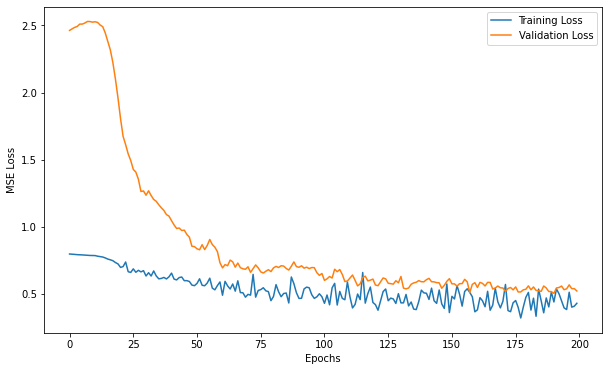

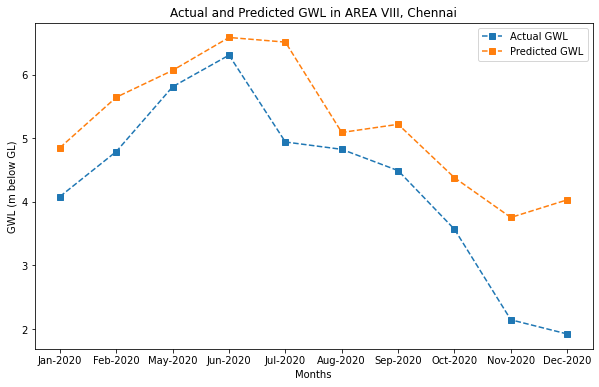

In [1254]:
model_08.compile(optimizer = 'adam', loss = 'mse')
print(model_08.summary())
print()

history_08 = model_08.fit(trainX_08, trainY_08, epochs = 200, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_08 = 12
forecast_08 = model_08.predict(trainX_08[-n_future_08:])
forecast_copies_08 = np.repeat(forecast_08, df_for_training_08.shape[1], axis = 1)
y_pred_future_08 = scaler_08.inverse_transform(forecast_copies_08)[:,0]
y_pred_for_test_08 = []
for i in range(len(y_pred_future_08)):
    if(i != 2 and i != 3):
        y_pred_for_test_08.append(y_pred_future_08[i])

rmse_08 =  RMSE(y_pred_for_test_08, np.asarray(df_test['AREA VIII']))
print('RMSE LOSS:', rmse_08)

plt.figure(figsize=(10,6))
plt.plot(history_08.history['loss'], label = 'Training Loss')
plt.plot(history_08.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA VIII']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_08, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA VIII, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1255]:
## AREA IX
df_for_training_09 = df09.astype(float)
scaler_09 = StandardScaler()
scaler_09 = scaler.fit(df_for_training_09)
df_for_training_scaled_09 = scaler.transform(df_for_training_09)
trainX_09 = []
trainY_09 = []
n_future_09 = 1
n_past_09 = 1
for i in range(n_past_09, len(df_for_training_scaled_09) - n_future_09 + 1):
    trainX_09.append(df_for_training_scaled_09[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_09.append(df_for_training_scaled_09[i + n_future_09 - 1 : i + n_future_09, 0])
trainX_09, trainY_09 = np.array(trainX_09), np.array(trainY_09)
model_09 = Sequential()
model_09.add(LSTM(4, activation = 'relu', input_shape = (trainX_09.shape[1], trainX_09.shape[2]), return_sequences = True))
model_09.add(LSTM(3, activation = 'relu', return_sequences = False))
model_09.add(Dropout(0.2))
model_09.add(Dense(trainY_09.shape[1]))

Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_338 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_339 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_169 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/300
22/22 [==============================] - 7s 34ms/step - loss: 0.8011 - val_loss: 2.8849
Epoch 2/300
22/22 [==============================] - 0s 6ms/step - loss: 0.8385 - val_loss: 2.9039
Epoch 3/300
22/22 [============================

Epoch 74/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2597 - val_loss: 0.4339
Epoch 75/300
22/22 [==============================] - 0s 6ms/step - loss: 0.3644 - val_loss: 0.3864
Epoch 76/300
22/22 [==============================] - 0s 7ms/step - loss: 0.5305 - val_loss: 0.3744
Epoch 77/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2644 - val_loss: 0.3963
Epoch 78/300
22/22 [==============================] - 0s 10ms/step - loss: 0.4238 - val_loss: 0.3910
Epoch 79/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3627 - val_loss: 0.4007
Epoch 80/300
22/22 [==============================] - 0s 8ms/step - loss: 0.4259 - val_loss: 0.4071
Epoch 81/300
22/22 [==============================] - 0s 8ms/step - loss: 0.2935 - val_loss: 0.3714
Epoch 82/300
22/22 [==============================] - 0s 10ms/step - loss: 0.2562 - val_loss: 0.3855
Epoch 83/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3325 - val_loss: 0.349

Epoch 155/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3709 - val_loss: 0.4455
Epoch 156/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3682 - val_loss: 0.4121
Epoch 157/300
22/22 [==============================] - 0s 12ms/step - loss: 0.3669 - val_loss: 0.3974
Epoch 158/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2695 - val_loss: 0.3646
Epoch 159/300
22/22 [==============================] - 0s 9ms/step - loss: 0.2307 - val_loss: 0.3260
Epoch 160/300
22/22 [==============================] - 0s 8ms/step - loss: 0.2148 - val_loss: 0.3338
Epoch 161/300
22/22 [==============================] - 0s 10ms/step - loss: 0.2772 - val_loss: 0.3792
Epoch 162/300
22/22 [==============================] - 0s 9ms/step - loss: 0.3504 - val_loss: 0.4084
Epoch 163/300
22/22 [==============================] - 0s 12ms/step - loss: 0.2222 - val_loss: 0.3903
Epoch 164/300
22/22 [==============================] - 0s 9ms/step - loss: 0.3022 - val_

22/22 [==============================] - 0s 11ms/step - loss: 0.3621 - val_loss: 0.3467
Epoch 237/300
22/22 [==============================] - 0s 8ms/step - loss: 0.1738 - val_loss: 0.3010
Epoch 238/300
22/22 [==============================] - 0s 9ms/step - loss: 0.2270 - val_loss: 0.2940
Epoch 239/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3610 - val_loss: 0.3085
Epoch 240/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3095 - val_loss: 0.2571
Epoch 241/300
22/22 [==============================] - 0s 6ms/step - loss: 0.4249 - val_loss: 0.2754
Epoch 242/300
22/22 [==============================] - 0s 8ms/step - loss: 0.2172 - val_loss: 0.3621
Epoch 243/300
22/22 [==============================] - 0s 11ms/step - loss: 0.1936 - val_loss: 0.3788
Epoch 244/300
22/22 [==============================] - 0s 10ms/step - loss: 0.2002 - val_loss: 0.3595
Epoch 245/300
22/22 [==============================] - 0s 9ms/step - loss: 0.2105 - val_loss: 0.2838
E

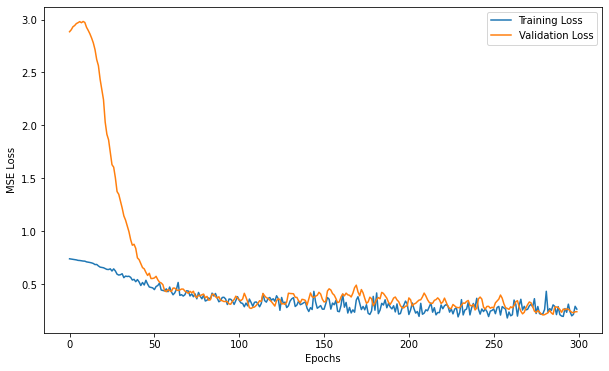

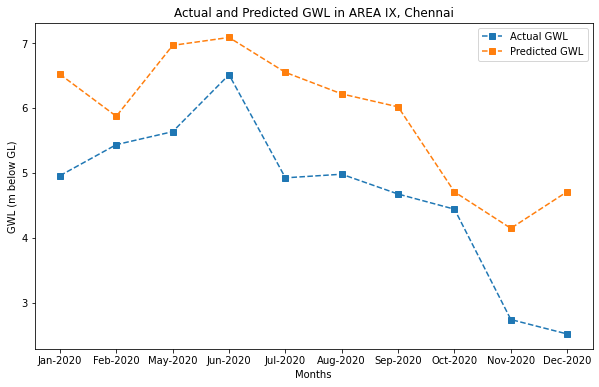

In [1256]:
model_09.compile(optimizer = 'adam', loss = 'mse')
print(model_09.summary())
print()

history_09 = model_09.fit(trainX_09, trainY_09, epochs = 300, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_09 = 12
forecast_09 = model_09.predict(trainX_09[-n_future_09:])
forecast_copies_09 = np.repeat(forecast_09, df_for_training_09.shape[1], axis = 1)
y_pred_future_09 = scaler_09.inverse_transform(forecast_copies_09)[:,0]
y_pred_for_test_09 = []
for i in range(len(y_pred_future_09)):
    if(i != 2 and i != 3):
        y_pred_for_test_09.append(y_pred_future_09[i])

rmse_09 =  RMSE(y_pred_for_test_09, np.asarray(df_test['AREA IX']))
print('RMSE LOSS:', rmse_09)

plt.figure(figsize=(10,6))
plt.plot(history_09.history['loss'], label = 'Training Loss')
plt.plot(history_09.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA IX']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_09, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA IX, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1281]:
## AREA X
df_for_training_10 = df10.astype(float)
scaler_10 = StandardScaler()
scaler_10 = scaler.fit(df_for_training_10)
df_for_training_scaled_10 = scaler.transform(df_for_training_10)
trainX_10 = []
trainY_10 = []
n_future_10 = 1
n_past_10 = 1
for i in range(n_past_10, len(df_for_training_scaled_10) - n_future_10 + 1):
    trainX_10.append(df_for_training_scaled_10[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_10.append(df_for_training_scaled_10[i + n_future_10 - 1 : i + n_future_10, 0])
trainX_10, trainY_10 = np.array(trainX_10), np.array(trainY_10)
model_10 = Sequential()
model_10.add(LSTM(3, activation = 'relu', input_shape = (trainX_10.shape[1], trainX_10.shape[2]), return_sequences = True))
model_10.add(LSTM(3, activation = 'relu', return_sequences = False))
model_10.add(Dropout(0.2))
model_10.add(Dense(trainY_10.shape[1]))

Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_362 (LSTM)              (None, 1, 3)              120       
_________________________________________________________________
lstm_363 (LSTM)              (None, 3)                 84        
_________________________________________________________________
dropout_181 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 4         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/200
22/22 [==============================] - 4s 29ms/step - loss: 0.7872 - val_loss: 2.4102
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9047 - val_loss: 2.4166
Epoch 3/200
22/22 [============================

22/22 [==============================] - 0s 9ms/step - loss: 0.4383 - val_loss: 0.4033
Epoch 75/200
22/22 [==============================] - 0s 7ms/step - loss: 0.6307 - val_loss: 0.4011
Epoch 76/200
22/22 [==============================] - 0s 8ms/step - loss: 0.5963 - val_loss: 0.4324
Epoch 77/200
22/22 [==============================] - 0s 7ms/step - loss: 0.4050 - val_loss: 0.4300
Epoch 78/200
22/22 [==============================] - 0s 8ms/step - loss: 0.4418 - val_loss: 0.3957
Epoch 79/200
22/22 [==============================] - 0s 8ms/step - loss: 0.2776 - val_loss: 0.3775
Epoch 80/200
22/22 [==============================] - 0s 11ms/step - loss: 0.5913 - val_loss: 0.3747
Epoch 81/200
22/22 [==============================] - 0s 7ms/step - loss: 0.3612 - val_loss: 0.3695
Epoch 82/200
22/22 [==============================] - 0s 7ms/step - loss: 0.3935 - val_loss: 0.3717
Epoch 83/200
22/22 [==============================] - 0s 8ms/step - loss: 0.3657 - val_loss: 0.3538
Epoch 84/200

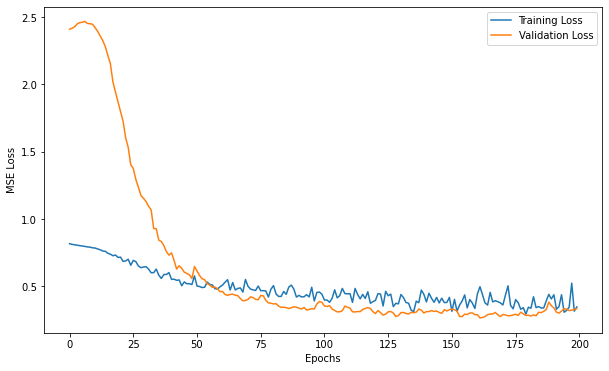

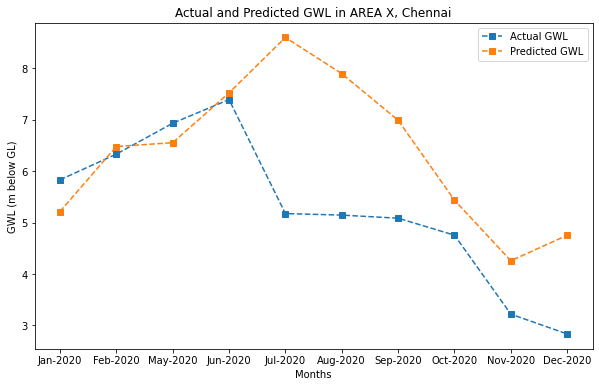

In [1282]:
model_10.compile(optimizer = 'adam', loss = 'mse')
print(model_10.summary())
print()

history_10 = model_10.fit(trainX_10, trainY_10, epochs = 200, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_10 = 12
forecast_10 = model_10.predict(trainX_10[-n_future_10:])
forecast_copies_10 = np.repeat(forecast_10, df_for_training_10.shape[1], axis = 1)
y_pred_future_10 = scaler_10.inverse_transform(forecast_copies_10)[:,0]
y_pred_for_test_10 = []
for i in range(len(y_pred_future_10)):
    if(i != 2 and i != 3):
        y_pred_for_test_10.append(y_pred_future_10[i])

rmse_10 =  RMSE(y_pred_for_test_10, np.asarray(df_test['AREA X']))
print('RMSE LOSS:', rmse_10)

plt.figure(figsize=(10,6))
plt.plot(history_10.history['loss'], label = 'Training Loss')
plt.plot(history_10.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA X']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_10, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA X, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1283]:
## AREA XI
df_for_training_11 = df11.astype(float)
scaler_11 = StandardScaler()
scaler_11 = scaler.fit(df_for_training_11)
df_for_training_scaled_11 = scaler.transform(df_for_training_11)
trainX_11 = []
trainY_11 = []
n_future_11 = 1
n_past_11 = 1
for i in range(n_past_11, len(df_for_training_scaled_11) - n_future_11 + 1):
    trainX_11.append(df_for_training_scaled_11[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_11.append(df_for_training_scaled_11[i + n_future_11 - 1 : i + n_future_11, 0])
trainX_11, trainY_11 = np.array(trainX_11), np.array(trainY_11)
model_11 = Sequential()
model_11.add(LSTM(4, activation = 'relu', input_shape = (trainX_11.shape[1], trainX_11.shape[2]), return_sequences = True))
model_11.add(LSTM(3, activation = 'relu', return_sequences = False))
model_11.add(Dropout(0.2))
model_11.add(Dense(trainY_11.shape[1]))

Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_364 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_365 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_182 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_182 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/200
22/22 [==============================] - 6s 32ms/step - loss: 1.1216 - val_loss: 2.0047
Epoch 2/200
22/22 [==============================] - 0s 6ms/step - loss: 0.8655 - val_loss: 1.9985
Epoch 3/200
22/22 [============================

Epoch 74/200
22/22 [==============================] - 0s 9ms/step - loss: 0.4068 - val_loss: 0.3108
Epoch 75/200
22/22 [==============================] - 0s 10ms/step - loss: 0.3663 - val_loss: 0.3080
Epoch 76/200
22/22 [==============================] - 0s 12ms/step - loss: 0.2817 - val_loss: 0.3034
Epoch 77/200
22/22 [==============================] - 0s 8ms/step - loss: 0.3514 - val_loss: 0.2999
Epoch 78/200
22/22 [==============================] - 0s 10ms/step - loss: 0.4191 - val_loss: 0.3026
Epoch 79/200
22/22 [==============================] - 0s 10ms/step - loss: 0.3392 - val_loss: 0.3016
Epoch 80/200
22/22 [==============================] - 0s 9ms/step - loss: 0.3670 - val_loss: 0.3116
Epoch 81/200
22/22 [==============================] - 0s 12ms/step - loss: 0.2869 - val_loss: 0.3029
Epoch 82/200
22/22 [==============================] - 0s 9ms/step - loss: 0.3602 - val_loss: 0.3005
Epoch 83/200
22/22 [==============================] - 0s 10ms/step - loss: 0.4523 - val_loss: 0

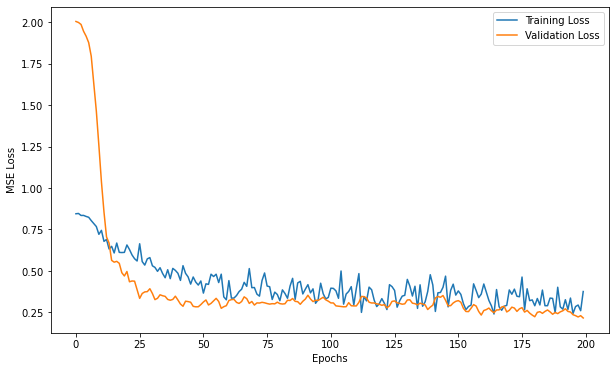

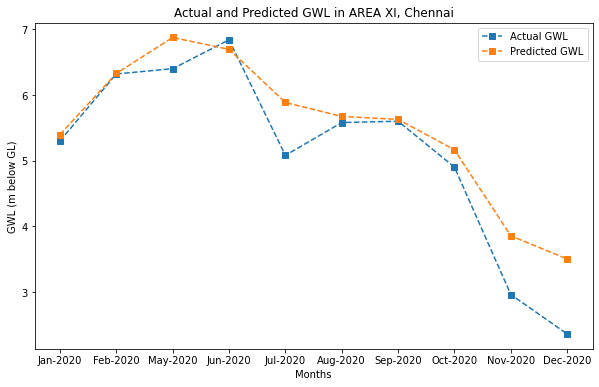

In [1284]:
model_11.compile(optimizer = 'adam', loss = 'mse')
print(model_11.summary())
print()

history_11 = model_11.fit(trainX_11, trainY_11, epochs = 200, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_11 = 12
forecast_11 = model_11.predict(trainX_11[-n_future_11:])
forecast_copies_11 = np.repeat(forecast_11, df_for_training_11.shape[1], axis = 1)
y_pred_future_11 = scaler_11.inverse_transform(forecast_copies_11)[:,0]
y_pred_for_test_11 = []
for i in range(len(y_pred_future_11)):
    if(i != 2 and i != 3):
        y_pred_for_test_11.append(y_pred_future_11[i])

rmse_11 =  RMSE(y_pred_for_test_11, np.asarray(df_test['AREA XI']))
print('RMSE LOSS:', rmse_11)

plt.figure(figsize=(10,6))
plt.plot(history_11.history['loss'], label = 'Training Loss')
plt.plot(history_11.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA XI']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_11, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA XI, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1307]:
## AREA XII
df_for_training_12 = df12.astype(float)
scaler_12 = StandardScaler()
scaler_12 = scaler.fit(df_for_training_12)
df_for_training_scaled_12 = scaler.transform(df_for_training_12)
trainX_12 = []
trainY_12 = []
n_future_12 = 1
n_past_12 = 1
for i in range(n_past_12, len(df_for_training_scaled_12) - n_future_12 + 1):
    trainX_12.append(df_for_training_scaled_12[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_12.append(df_for_training_scaled_12[i + n_future_12 - 1 : i + n_future_12, 0])
trainX_12, trainY_12 = np.array(trainX_12), np.array(trainY_12)
model_12 = Sequential()
model_12.add(LSTM(4, activation = 'relu', input_shape = (trainX_12.shape[1], trainX_12.shape[2]), return_sequences = True))
model_12.add(LSTM(3, activation = 'relu', return_sequences = False))
model_12.add(Dropout(0.2))
model_12.add(Dense(trainY_12.shape[1]))

Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_386 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_387 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_193 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/200
22/22 [==============================] - 4s 30ms/step - loss: 0.7044 - val_loss: 3.1117
Epoch 2/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7147 - val_loss: 3.1323
Epoch 3/200
22/22 [============================

22/22 [==============================] - 0s 7ms/step - loss: 0.2746 - val_loss: 0.4433
Epoch 75/200
22/22 [==============================] - 0s 8ms/step - loss: 0.6444 - val_loss: 0.4490
Epoch 76/200
22/22 [==============================] - 0s 11ms/step - loss: 0.5870 - val_loss: 0.4309
Epoch 77/200
22/22 [==============================] - 0s 8ms/step - loss: 0.3922 - val_loss: 0.3981
Epoch 78/200
22/22 [==============================] - 0s 7ms/step - loss: 0.3624 - val_loss: 0.3703
Epoch 79/200
22/22 [==============================] - 0s 9ms/step - loss: 0.2887 - val_loss: 0.3869
Epoch 80/200
22/22 [==============================] - 0s 9ms/step - loss: 0.2634 - val_loss: 0.3815
Epoch 81/200
22/22 [==============================] - 0s 9ms/step - loss: 0.2468 - val_loss: 0.3998
Epoch 82/200
22/22 [==============================] - 0s 9ms/step - loss: 0.4360 - val_loss: 0.3817
Epoch 83/200
22/22 [==============================] - 0s 6ms/step - loss: 0.2837 - val_loss: 0.3618
Epoch 84/200

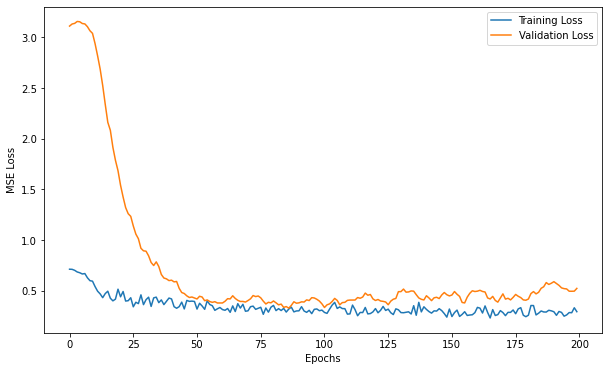

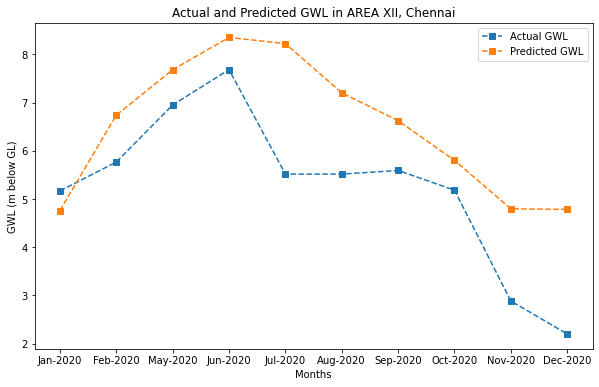

In [1308]:
model_12.compile(optimizer = 'adam', loss = 'mse')
print(model_12.summary())
print()

history_12 = model_12.fit(trainX_12, trainY_12, epochs = 200, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_12 = 12
forecast_12 = model_12.predict(trainX_12[-n_future_12:])
forecast_copies_12 = np.repeat(forecast_12, df_for_training_12.shape[1], axis = 1)
y_pred_future_12 = scaler_12.inverse_transform(forecast_copies_12)[:,0]
y_pred_for_test_12 = []
for i in range(len(y_pred_future_12)):
    if(i != 2 and i != 3):
        y_pred_for_test_12.append(y_pred_future_12[i])

rmse_12 =  RMSE(y_pred_for_test_12, np.asarray(df_test['AREA XII']))
print('RMSE LOSS:', rmse_12)

plt.figure(figsize=(10,6))
plt.plot(history_12.history['loss'], label = 'Training Loss')
plt.plot(history_12.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA XII']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_12, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA XII, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1331]:
## AREA XIII
df_for_training_13 = df13.astype(float)
scaler_13 = StandardScaler()
scaler_13 = scaler.fit(df_for_training_13)
df_for_training_scaled_13 = scaler.transform(df_for_training_13)
trainX_13 = []
trainY_13 = []
n_future_13 = 1
n_past_13 = 1
for i in range(n_past_13, len(df_for_training_scaled_13) - n_future_13 + 1):
    trainX_13.append(df_for_training_scaled_13[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_13.append(df_for_training_scaled_13[i + n_future_13 - 1 : i + n_future_13, 0])
trainX_13, trainY_13 = np.array(trainX_13), np.array(trainY_13)
model_13 = Sequential()
model_13.add(LSTM(3, activation = 'relu', input_shape = (trainX_13.shape[1], trainX_13.shape[2]), return_sequences = True))
model_13.add(LSTM(3, activation = 'relu', return_sequences = False))
model_13.add(Dropout(0.2))
model_13.add(Dense(trainY_13.shape[1]))

Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_410 (LSTM)              (None, 1, 3)              120       
_________________________________________________________________
lstm_411 (LSTM)              (None, 3)                 84        
_________________________________________________________________
dropout_205 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 4         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/150
22/22 [==============================] - 5s 42ms/step - loss: 0.6591 - val_loss: 3.0691
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 0.6966 - val_loss: 3.0829
Epoch 3/150
22/22 [============================

Epoch 74/150
22/22 [==============================] - 0s 8ms/step - loss: 0.1879 - val_loss: 0.5361
Epoch 75/150
22/22 [==============================] - 0s 6ms/step - loss: 0.2985 - val_loss: 0.5327
Epoch 76/150
22/22 [==============================] - 0s 5ms/step - loss: 0.1546 - val_loss: 0.5357
Epoch 77/150
22/22 [==============================] - 0s 6ms/step - loss: 0.1464 - val_loss: 0.5291
Epoch 78/150
22/22 [==============================] - 0s 6ms/step - loss: 0.1898 - val_loss: 0.5510
Epoch 79/150
22/22 [==============================] - 0s 6ms/step - loss: 0.2587 - val_loss: 0.5336
Epoch 80/150
22/22 [==============================] - 0s 6ms/step - loss: 0.3479 - val_loss: 0.5421
Epoch 81/150
22/22 [==============================] - 0s 6ms/step - loss: 0.2168 - val_loss: 0.5521
Epoch 82/150
22/22 [==============================] - 0s 8ms/step - loss: 0.3632 - val_loss: 0.5416
Epoch 83/150
22/22 [==============================] - 0s 7ms/step - loss: 0.1792 - val_loss: 0.5410


RMSE LOSS: 1.7258888974540623


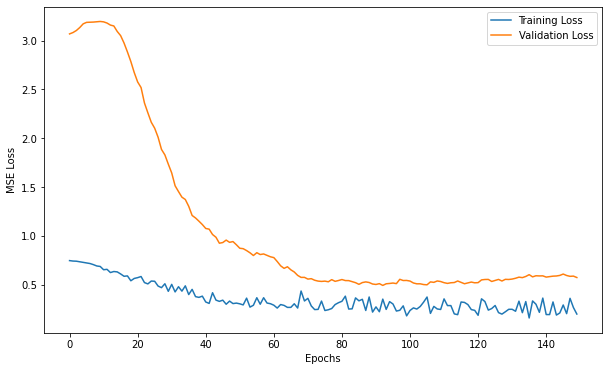

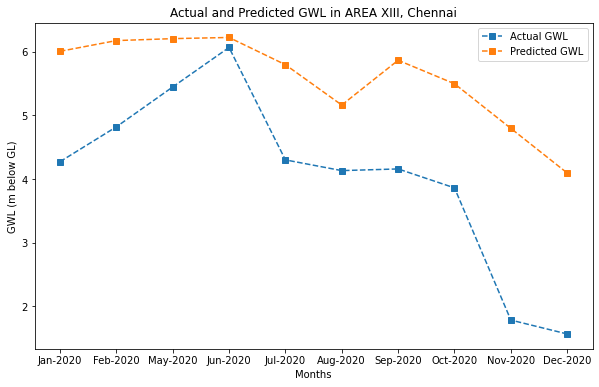

In [1332]:
model_13.compile(optimizer = 'adam', loss = 'mse')
print(model_13.summary())
print()

history_13 = model_13.fit(trainX_13, trainY_13, epochs = 150, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_13 = 12
forecast_13 = model_13.predict(trainX_13[-n_future_13:])
forecast_copies_13 = np.repeat(forecast_13, df_for_training_13.shape[1], axis = 1)
y_pred_future_13 = scaler_13.inverse_transform(forecast_copies_13)[:,0]
y_pred_for_test_13 = []
for i in range(len(y_pred_future_13)):
    if(i != 2 and i != 3):
        y_pred_for_test_13.append(y_pred_future_13[i])

rmse_13 =  RMSE(y_pred_for_test_13, np.asarray(df_test['AREA XIII']))
print('RMSE LOSS:', rmse_13)

plt.figure(figsize=(10,6))
plt.plot(history_13.history['loss'], label = 'Training Loss')
plt.plot(history_13.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA XIII']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_13, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA XIII, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1341]:
## AREA XIV
df_for_training_14 = df14.astype(float)
scaler_14 = StandardScaler()
scaler_14 = scaler.fit(df_for_training_14)
df_for_training_scaled_14 = scaler.transform(df_for_training_14)
trainX_14 = []
trainY_14 = []
n_future_14 = 1
n_past_14 = 1
for i in range(n_past_14, len(df_for_training_scaled_14) - n_future_14 + 1):
    trainX_14.append(df_for_training_scaled_14[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_14.append(df_for_training_scaled_14[i + n_future_14 - 1 : i + n_future_14, 0])
trainX_14, trainY_14 = np.array(trainX_14), np.array(trainY_14)
model_14 = Sequential()
model_14.add(LSTM(4, activation = 'relu', input_shape = (trainX_14.shape[1], trainX_14.shape[2]), return_sequences = True))
model_14.add(LSTM(3, activation = 'relu', return_sequences = False))
model_14.add(Dropout(0.2))
model_14.add(Dense(trainY_14.shape[1]))

Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_420 (LSTM)              (None, 1, 4)              176       
_________________________________________________________________
lstm_421 (LSTM)              (None, 3)                 96        
_________________________________________________________________
dropout_210 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 4         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/300
22/22 [==============================] - 5s 31ms/step - loss: 0.9647 - val_loss: 1.9338
Epoch 2/300
22/22 [==============================] - 0s 9ms/step - loss: 0.9372 - val_loss: 1.9322
Epoch 3/300
22/22 [============================

22/22 [==============================] - 0s 8ms/step - loss: 0.4646 - val_loss: 0.4287
Epoch 75/300
22/22 [==============================] - 0s 10ms/step - loss: 0.5598 - val_loss: 0.4612
Epoch 76/300
22/22 [==============================] - 0s 9ms/step - loss: 0.6220 - val_loss: 0.4059
Epoch 77/300
22/22 [==============================] - 0s 8ms/step - loss: 0.3798 - val_loss: 0.3949
Epoch 78/300
22/22 [==============================] - 0s 12ms/step - loss: 0.4463 - val_loss: 0.3962
Epoch 79/300
22/22 [==============================] - 0s 7ms/step - loss: 0.5603 - val_loss: 0.3928
Epoch 80/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3988 - val_loss: 0.4137
Epoch 81/300
22/22 [==============================] - 0s 8ms/step - loss: 0.4634 - val_loss: 0.3903
Epoch 82/300
22/22 [==============================] - 0s 10ms/step - loss: 0.6353 - val_loss: 0.3996
Epoch 83/300
22/22 [==============================] - 0s 10ms/step - loss: 0.5237 - val_loss: 0.4020
Epoch 84/

22/22 [==============================] - 0s 7ms/step - loss: 0.2162 - val_loss: 0.2471
Epoch 237/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2451 - val_loss: 0.2495
Epoch 238/300
22/22 [==============================] - 0s 5ms/step - loss: 0.3001 - val_loss: 0.2532
Epoch 239/300
22/22 [==============================] - 0s 5ms/step - loss: 0.3682 - val_loss: 0.2560
Epoch 240/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2743 - val_loss: 0.2517
Epoch 241/300
22/22 [==============================] - 0s 6ms/step - loss: 0.4187 - val_loss: 0.2582
Epoch 242/300
22/22 [==============================] - 0s 5ms/step - loss: 0.3093 - val_loss: 0.2599
Epoch 243/300
22/22 [==============================] - 0s 5ms/step - loss: 0.2313 - val_loss: 0.2634
Epoch 244/300
22/22 [==============================] - 0s 5ms/step - loss: 0.2170 - val_loss: 0.2774
Epoch 245/300
22/22 [==============================] - 0s 7ms/step - loss: 0.2500 - val_loss: 0.2702
Epoc

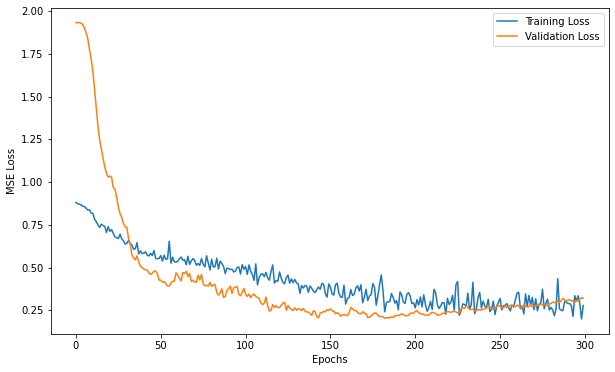

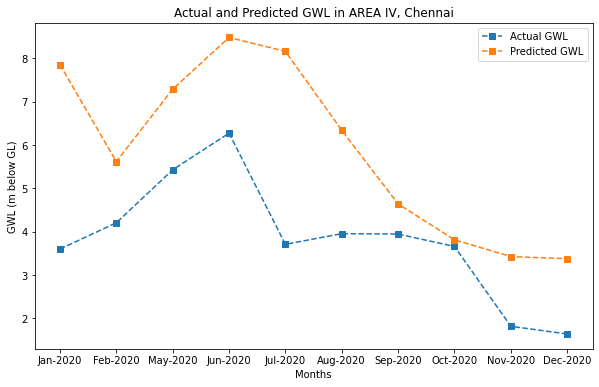

In [1342]:
model_14.compile(optimizer = 'adam', loss = 'mse')
print(model_14.summary())
print()

history_14 = model_14.fit(trainX_14, trainY_14, epochs = 300, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_14 = 12
forecast_14 = model_14.predict(trainX_14[-n_future_14:])
forecast_copies_14 = np.repeat(forecast_14, df_for_training_14.shape[1], axis = 1)
y_pred_future_14 = scaler_14.inverse_transform(forecast_copies_14)[:,0]
y_pred_for_test_14 = []
for i in range(len(y_pred_future_14)):
    if(i != 2 and i != 3):
        y_pred_for_test_14.append(y_pred_future_14[i])

rmse_14 =  RMSE(y_pred_for_test_14, np.asarray(df_test['AREA IV']))
print('RMSE LOSS:', rmse_14)

plt.figure(figsize=(10,6))
plt.plot(history_14.history['loss'], label = 'Training Loss')
plt.plot(history_14.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA XIV']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_14, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA IV, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

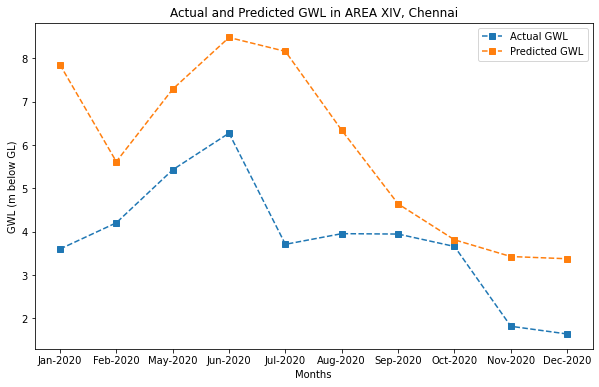

In [1360]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA XIV']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_14, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA XIV, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1357]:
## AREA XV
df_for_training_15 = df15.astype(float)
scaler_15 = StandardScaler()
scaler_15 = scaler.fit(df_for_training_15)
df_for_training_scaled_15 = scaler.transform(df_for_training_15)
trainX_15 = []
trainY_15 = []
n_future_15 = 1
n_past_15 = 1
for i in range(n_past_15, len(df_for_training_scaled_15) - n_future_15 + 1):
    trainX_15.append(df_for_training_scaled_15[i - n_past:i, 0:df_for_training.shape[1]])
    trainY_15.append(df_for_training_scaled_15[i + n_future_15 - 1 : i + n_future_15, 0])
trainX_15, trainY_15 = np.array(trainX_15), np.array(trainY_15)
model_15 = Sequential()
model_15.add(LSTM(3, activation = 'relu', input_shape = (trainX_15.shape[1], trainX_15.shape[2]), return_sequences = True))
model_15.add(LSTM(3, activation = 'relu', return_sequences = False))
model_15.add(Dropout(0.2))
model_15.add(Dense(trainY_15.shape[1]))

Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_436 (LSTM)              (None, 1, 3)              120       
_________________________________________________________________
lstm_437 (LSTM)              (None, 3)                 84        
_________________________________________________________________
dropout_218 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_218 (Dense)            (None, 1)                 4         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/200
22/22 [==============================] - 5s 42ms/step - loss: 0.8457 - val_loss: 3.8696
Epoch 2/200
22/22 [==============================] - 0s 6ms/step - loss: 0.7102 - val_loss: 3.9076
Epoch 3/200
22/22 [============================

22/22 [==============================] - 0s 8ms/step - loss: 0.3537 - val_loss: 0.2979
Epoch 75/200
22/22 [==============================] - 0s 7ms/step - loss: 0.3073 - val_loss: 0.3110
Epoch 76/200
22/22 [==============================] - 0s 6ms/step - loss: 0.1891 - val_loss: 0.3191
Epoch 77/200
22/22 [==============================] - 0s 6ms/step - loss: 0.2064 - val_loss: 0.3272
Epoch 78/200
22/22 [==============================] - 0s 5ms/step - loss: 0.3277 - val_loss: 0.3305
Epoch 79/200
22/22 [==============================] - 0s 11ms/step - loss: 0.2590 - val_loss: 0.3391
Epoch 80/200
22/22 [==============================] - 0s 7ms/step - loss: 0.2296 - val_loss: 0.3240
Epoch 81/200
22/22 [==============================] - 0s 9ms/step - loss: 0.2369 - val_loss: 0.3335
Epoch 82/200
22/22 [==============================] - 0s 10ms/step - loss: 0.2509 - val_loss: 0.3408
Epoch 83/200
22/22 [==============================] - 0s 9ms/step - loss: 0.1931 - val_loss: 0.3308
Epoch 84/20

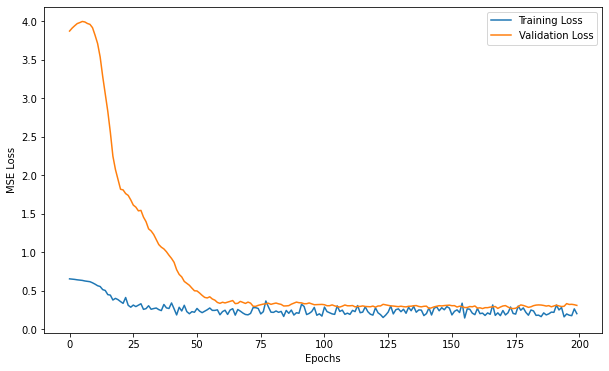

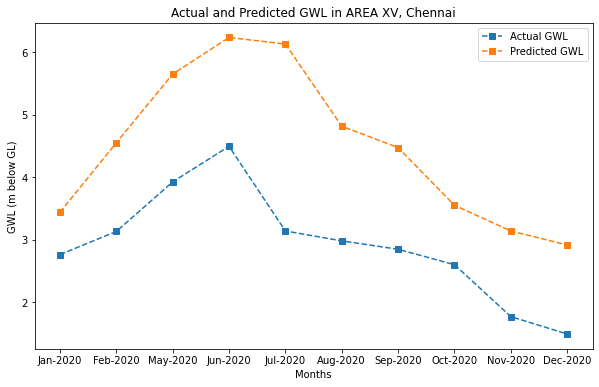

In [1358]:
model_15.compile(optimizer = 'adam', loss = 'mse')
print(model_15.summary())
print()

history_15 = model_15.fit(trainX_15, trainY_15, epochs = 200, batch_size = 4, validation_split=0.1, verbose = 1)

n_future_15 = 12
forecast_15 = model_15.predict(trainX_15[-n_future_15:])
forecast_copies_15 = np.repeat(forecast_15, df_for_training_15.shape[1], axis = 1)
y_pred_future_15 = scaler_15.inverse_transform(forecast_copies_15)[:,0]
y_pred_for_test_15 = []
for i in range(len(y_pred_future_15)):
    if(i != 2 and i != 3):
        y_pred_for_test_15.append(y_pred_future_15[i])

rmse_15 =  RMSE(y_pred_for_test_15, np.asarray(df_test['AREA XV']))
print('RMSE LOSS:', rmse_15)

plt.figure(figsize=(10,6))
plt.plot(history_15.history['loss'], label = 'Training Loss')
plt.plot(history_15.history['val_loss'], label = 'Validation Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_test['Month-Year'].iloc[-10:], np.asarray(df_test['AREA XV']), 's--')
plt.plot(df_test['Month-Year'].iloc[-10:], y_pred_for_test_15, 's--')
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL in AREA XV, Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

In [1380]:
from statsmodels.tsa.stattools import adfuller

In [1383]:
def adfuller_test(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if(result[1] <= 0.05):
        print('Strong evidence against the null hyphothesis')
    else:
        print('Weak evidence against the null hypothesis')

In [1384]:
adfuller_test(df01['AREA I'])

ADF Test Statistic : -3.7338002874302516
p-value : 0.003662075690535309
#Lags Used : 1
Number of Observations Used : 94
Strong evidence against the null hyphothesis


<AxesSubplot:xlabel='Month-Year'>

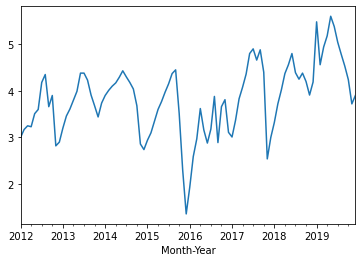

In [1385]:
df01['AREA I'].plot()

In [1386]:
from statsmodels.tsa.arima_model import ARIMA

In [1393]:
df01['AREA I']

Month-Year
2012-01-01    3.00
2012-02-01    3.17
2012-03-01    3.25
2012-04-01    3.23
2012-05-01    3.51
              ... 
2019-08-01    4.78
2019-09-01    4.53
2019-10-01    4.24
2019-11-01    3.72
2019-12-01    3.90
Name: AREA I, Length: 96, dtype: float64

In [1394]:
model_01_ar = ARIMA (df01['AREA I'], order = (1, 1, 1))
model_01_ar_fit = model_01_ar.fit()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [1395]:
model_01_ar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.AREA I   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.437
Method:                       css-mle   S.D. of innovations              0.467
Date:                Fri, 27 May 2022   AIC                            132.875
Time:                        16:25:02   BIC                            143.090
Sample:                    02-01-2012   HQIC                           137.003
                         - 12-01-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0099      0.052      0.190      0.849      -0.092       0.111
ar.L1.D.AREA I    -0.3002      0.615     -0.489      0.625      -1.505       0.904
ma.L1.D.AREA I     0.4084      0.585      0.698      0.485      -0.739       1.555
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3308           +0.0000j            3.3308            0.5000
MA.1           -2.4484           +0.0000j            2.4484            0.5000
-----------------------------------------------------------------------------
"""

In [1396]:
ar_01_ans = model_01_ar_fit.predict(start = 96, end = 106, dynamic  = True)

In [1427]:
my_ans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             AREA I   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -50.374
Date:                            Fri, 27 May 2022   AIC                            110.748
Time:                                    16:59:15   BIC                            122.842
Sample:                                01-01-2012   HQIC                           115.606
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6287      0.164      3.827      0.000       0.307       0.951
ma.L1         -0.8593      0.126     -6.825      0.000      -1.106      -0.613
ar.S.L12      -0.1092      0.159     -0.686      0.493      -0.421       0.203
ma.S.L12      -0.9946     15.528     -0.064      0.949     -31.428      29.439
sigma2         0.1418      2.186      0.065      0.948      -4.143       4.426
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.59   Prob(JB):                         0.15
Heteroskedasticity (H):               4.17   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1398]:
import statsmodels.api as sm

In [1399]:
model_01_sm = sm.tsa.statespace.SARIMAX(df01['AREA I'], order = (1, 1, 1), seasonal_order = (1,1, 1, 12))
my_ans = model_01_sm.fit()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1407]:
my_res = my_ans.predict(start = 96, end = 107, dynamic = True)

In [1408]:
my_res

2020-01-01    4.145758
2020-02-01    4.404651
2020-03-01    4.639649
2020-04-01    4.882929
2020-05-01    4.990863
2020-06-01    5.155354
2020-07-01    5.226729
2020-08-01    5.280673
2020-09-01    5.041887
2020-10-01    4.866493
2020-11-01    4.110039
2020-12-01    4.021745
Freq: MS, Name: predicted_mean, dtype: float64

In [1409]:
my_res_for_test = []
for i in range(len(my_res)):
    if i != 2 and i != 3:
        my_res_for_test.append(my_res[i])

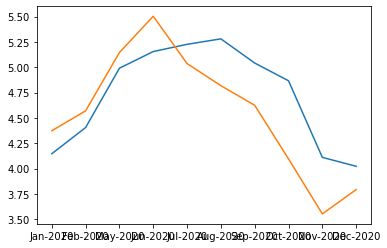

In [1411]:
plt.plot(df_test['Month-Year'], my_res_for_test)
plt.plot(df_test['Month-Year'], y_pred_for_test_01 )

In [1412]:
RMSE(my_res_for_test, y_pred_for_test_01)

0.4011167773563462

In [1421]:
model_09_sm = sm.tsa.statespace.SARIMAX(df09['AREA IX'], order = (1, 1, 1), seasonal_order = (1,1, 1, 12))
my_ans_09 = model_09_sm.fit()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


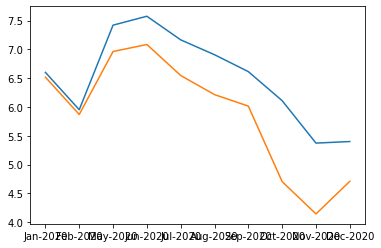

In [1422]:
my_res_09 = my_ans_09.predict(start = 96, end = 107, dynamic = True)
my_res_for_test_09 = []
for i in range(len(my_res_09)):
    if i != 2 and i != 3:
        my_res_for_test_09.append(my_res_09[i])
plt.plot(df_test['Month-Year'], my_res_for_test_09)
plt.plot(df_test['Month-Year'], y_pred_for_test_09)

In [1423]:
RMSE(my_res_for_test_09, np.asarray(df_test['AREA IX']))

1.946239454507876

In [1424]:
df_test

,Month-Year,AREA I,AREA II,AREA III,AREA IV,AREA IX,AREA V,AREA VI,AREA VII,AREA VIII,AREA X,AREA XI,AREA XII,AREA XIII,AREA XIV,AREA XV
96,Jan-2020,4.46,3.97,5.133333,5.833333,4.955556,6.400000,5.02,5.066667,4.084615,5.830,5.30,5.166667,4.273684,3.600000,2.761538
97,Feb-2020,4.70,4.23,5.555556,6.105556,5.433333,6.700000,5.41,5.983333,4.792308,6.330,6.32,5.766667,4.821053,4.204545,3.130769
98,May-2020,5.18,5.26,6.522222,6.255556,5.633333,7.072222,7.52,7.716667,5.811538,6.930,6.40,6.950000,5.447368,5.427273,3.923077
99,Jun-2020,5.56,5.69,6.988889,7.355556,6.511111,7.522222,7.94,8.333333,6.307692,7.390,6.84,7.683333,6.068421,6.272727,4.492308
100,Jul-2020,4.68,4.38,5.688889,6.388889,4.922222,6.616667,6.42,7.266667,4.942308,5.175,5.08,5.516667,4.302632,3.709091,3.138462
101,Aug-2020,4.77,4.40,5.966667,6.550000,4.977778,6.794444,6.76,7.416667,4.826923,5.145,5.58,5.516667,4.134211,3.954545,2.980769
102,Sep-2020,4.95,4.19,5.622222,6.533333,4.672222,6.644444,5.96,6.683333,4.492308,5.085,5.60,5.591667,4.160526,3.945455,2.846154
103,Oct-2020,4.50,3.64,4.955556,6.183333,4.438889,6.444444,5.22,5.783333,3.569231,4.755,4.90,5.183333,3.863158,3.659091,2.600000
104,Nov-2020,3.28,2.37,3.366667,4.805556,2.738889,4.894444,2.56,2.966667,2.146154,3.220,2.96,2.883333,1.786842,1.818182,1.769231
105,Dec-2020,3.13,2.25,3.300000,4.672222,2.516667,4.644444,2.52,2.879167,1.923077,2.835,2.36,2.200000,1.568421,1.640909,1.492308


In [598]:
def Apply_LSTM(inp):
    df_for_training = inp.astype(float)
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    trainX = []
    trainY = []
    n_future = 1
    n_past = 1
    for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
        trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
        trainY.append(df_for_training_scaled[i + n_future - 1 : i + n_future, 0])
    trainX, trainY = np.array(trainX), np.array(trainY)
    model = Sequential()
    model.add(LSTM(3, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences = True))
    model.add(LSTM(2, activation = 'relu', return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer = 'adam', loss = 'mse')
    print(model.summary())
    histroy = model.fit(trainX, trainY, epochs = 50, batch_size = 4, validation_split=0.1, verbose = 1)
    forecast_dates = pd.date_range('2020-01-01', '2020-12-01', freq = 'MS').strftime("%Y-%b").tolist()
    n_future = 12
    forecast = model.predict(trainX[-n_future:])
    forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1)
    y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
    return y_pred_future

In [599]:
res = Apply_LSTM(df02)

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_142 (LSTM)              (None, 1, 3)              120       
_________________________________________________________________
lstm_143 (LSTM)              (None, 2)                 48        
_________________________________________________________________
dropout_71 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 3         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
22/22 [==============================] - 4s 28ms/step - loss: 0.8586 - val_loss: 2.9341
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.8117 - val_loss: 2.9570
Epoch 3/50
22/22 [==============================] -

In [600]:
res

array([3.602662 , 4.944837 , 4.173956 , 4.929915 , 5.0002503, 6.698336 ,
       6.020467 , 4.8699317, 4.814736 , 4.053747 , 3.398146 , 3.3149984],
      dtype=float32)

In [601]:
y_pred_for_test = []
for i in range(len(res)):
    if(i != 2 and i != 3):
        y_pred_for_test.append(res[i])

In [602]:
def RMSE(a,b):
    res = 0
    for i in range(len(a)):
        res += (a[i] - b[i]) ** 2
    return math.sqrt(res)

In [603]:
RMSE(y_pred_for_test, np.asarray(df_test['AREA II']))

2.7193556629865583

In [540]:
df_test['AREA II']

96     3.97
97     4.23
98     5.26
99     5.69
100    4.38
101    4.40
102    4.19
103    3.64
104    2.37
105    2.25
Name: AREA II, dtype: float64

In [1366]:
rmse_11

0.5559545131222616

In [1373]:
df_table = pd.DataFrame(columns = ['AREA', 'Test RMSE of Best Model'])

In [1374]:
df_table = df_table.append({'AREA': 'AREA I', 'Test RMSE of Best Model':rmse_01}, ignore_index = True)

In [1375]:
df_table

,AREA,Test RMSE of Best Model
0,AREA I,0.306559


In [1376]:
df_table = df_table.append({'AREA': 'AREA II', 'Test RMSE of Best Model':rmse_02}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA III', 'Test RMSE of Best Model':rmse_03}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA IV', 'Test RMSE of Best Model':rmse_04}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA V', 'Test RMSE of Best Model':rmse_05}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA VI', 'Test RMSE of Best Model':rmse_06}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA VII', 'Test RMSE of Best Model':rmse_07}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA VIII', 'Test RMSE of Best Model':rmse_08}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA IX', 'Test RMSE of Best Model':rmse_09}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA X', 'Test RMSE of Best Model':rmse_10}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA XI', 'Test RMSE of Best Model':rmse_11}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA XII', 'Test RMSE of Best Model':rmse_12}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA XIII', 'Test RMSE of Best Model':rmse_13}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA XIV', 'Test RMSE of Best Model':rmse_14}, ignore_index = True)
df_table = df_table.append({'AREA': 'AREA XV', 'Test RMSE of Best Model':rmse_15}, ignore_index = True)

In [1378]:
df_table.to_excel('Result.xlsx')

In [6]:
df['GWL prev month'] = df['Besant Nagar (Temple Well)'].shift(1)

In [885]:
df

,AREA I,AREA II,AREA III,AREA IV,AREA IX,AREA V,AREA VI,AREA VII,AREA VIII,AREA X,AREA XI,AREA XII,AREA XIII,AREA XIV,AREA XV,MAX,MIN,AW,RF,EVP
Month-Year,,,,,,,,,,,,,,,,,,,,
2012-01-01,3.00,1.870,2.544444,2.255556,2.027778,2.727778,1.020,1.966667,1.869231,1.890,2.520,1.750000,2.350000,2.200000,1.669231,30.264516,20.435484,4.354839,1.312903,2.867742
2012-02-01,3.17,2.060,2.850000,2.800000,2.678889,3.316667,1.640,2.945833,2.615385,3.095,3.120,2.466667,2.860526,2.627273,2.188462,31.968966,20.913793,4.620690,0.000000,3.858621
2012-03-01,3.25,2.322,3.170000,3.366667,3.195556,3.994444,2.064,3.345000,3.173077,3.758,3.984,2.653333,3.357895,3.414545,2.662308,35.219355,24.090323,7.516129,0.000000,5.200000
2012-04-01,3.23,2.500,3.633333,3.777778,4.011111,4.338889,2.290,4.454167,4.030769,4.375,4.770,3.700000,4.339474,4.172727,3.326923,36.073333,26.570000,8.400000,0.073333,5.400000
2012-05-01,3.51,2.820,4.055556,4.277778,4.422222,4.611111,3.170,5.470833,4.361538,4.740,5.250,4.466667,4.821053,4.863636,3.742308,40.090323,28.506452,8.580645,0.006452,6.854839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,4.78,5.410,7.611111,7.744444,6.483333,7.744444,8.340,9.158333,6.734615,7.950,6.580,8.608333,7.136842,5.318182,5.284615,35.003226,25.929032,6.870968,5.545161,5.486667
2019-09-01,4.53,4.990,6.300000,7.005556,5.977778,7.222222,5.740,7.491667,5.807692,7.270,6.340,7.950000,6.321053,4.718182,4.346154,33.350000,25.196667,4.700000,8.173333,4.746429
2019-10-01,4.24,4.090,4.711111,6.788889,5.300000,6.922222,5.240,5.450000,4.069231,6.010,4.680,6.016667,4.900000,4.209091,3.923077,32.122581,24.948387,2.500000,10.112903,5.183871


In [21]:
X_data = df[['MAX', 'MIN', 'AW', 'RF', 'EVP', 'GWL prev month']].iloc[1:]
y_data = df['Besant Nagar (Temple Well)'].iloc[1:]

In [23]:
X = tf.convert_to_tensor(X_data)
y = tf.convert_to_tensor(y_data)

In [24]:
y

<tf.Tensor: shape=(129,), dtype=float64, numpy=
array([2.95, 3.15, 3.35, 3.45, 4.05, 4.15, 4.45, 4.35, 4.15, 3.35, 2.55,
       2.75, 2.95, 3.15, 3.35, 3.45, 4.05, 4.15, 4.45, 4.35, 4.15, 3.35,
       2.55, 2.8 , 3.25, 3.81, 4.4 , 4.6 , 5.3 , 5.45, 5.6 , 5.4 , 5.3 ,
       3.6 , 3.65, 3.75, 4.05, 4.15, 4.65, 4.75, 4.85, 5.15, 5.05, 4.25,
       4.05, 4.05, 4.33, 4.4 , 4.5 , 4.65, 4.75, 4.85, 5.  , 5.05, 5.25,
       5.15, 4.9 , 3.55, 3.6 , 3.6 , 3.75, 4.  , 3.95, 4.35, 4.65, 4.8 ,
       5.05, 5.4 , 5.25, 1.8 , 0.65, 2.1 , 2.4 , 2.75, 3.2 , 2.9 , 2.7 ,
       3.15, 3.85, 3.1 , 3.35, 3.45, 2.75, 2.95, 3.2 , 3.4 , 3.6 , 3.7 ,
       3.75, 3.95, 4.3 , 4.4 , 4.2 , 2.9 , 3.3 , 4.  , 4.5 , 4.8 , 5.4 ,
       5.5 , 5.7 , 5.5 , 5.35, 5.4 , 5.1 , 4.95, 6.1 , 8.4 , 6.9 , 7.05,
       7.  , 7.2 , 7.3 , 7.1 , 7.2 , 6.  , 5.4 , 5.  , 5.4 , 5.4 , 5.8 ,
       6.4 , 7.1 , 5.55, 5.55, 5.45, 5.15, 4.05, 3.15])>

In [27]:
X_train = X[:-10]
y_train = y[:-10]

In [70]:
X_test = X[-10:]
y_test = y[-10:]

In [30]:
X_train.shape[1:]

TensorShape([6])

In [45]:
X_train

<tf.Tensor: shape=(119, 6), dtype=float64, numpy=
array([[3.15000000e+01, 2.21928571e+01, 5.46428571e+00, 0.00000000e+00,
        4.23214286e+00, 2.75000000e+00],
       [3.48233333e+01, 2.44566667e+01, 7.16666667e+00, 0.00000000e+00,
        4.98000000e+00, 2.95000000e+00],
       [3.69033333e+01, 2.73800000e+01, 9.46666667e+00, 0.00000000e+00,
        5.95666667e+00, 3.15000000e+00],
       [3.74903226e+01, 2.75838710e+01, 8.74193548e+00, 5.68709677e+00,
        5.99032258e+00, 3.35000000e+00],
       [3.58600000e+01, 2.63033333e+01, 7.20000000e+00, 4.32000000e+00,
        5.27000000e+00, 3.45000000e+00],
       [3.39612903e+01, 2.54774194e+01, 5.61290323e+00, 4.57419355e+00,
        3.47419355e+00, 4.05000000e+00],
       [3.38870968e+01, 2.57161290e+01, 7.12903226e+00, 8.17096774e+00,
        4.73870968e+00, 4.15000000e+00],
       [3.32966667e+01, 2.53666667e+01, 4.76666667e+00, 4.93000000e+00,
        3.77666667e+00, 4.45000000e+00],
       [3.37903226e+01, 2.54677419e+01, 4.7741

In [427]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(2, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(2, activation = 'relu')(hidden1)
output = keras.layers.Dense(1, activation = 'relu')(hidden2)
model = keras.Model(inputs = [input_], outputs = [output])

In [428]:
optimizer = RMSprop(0.005)
model.compile(optimizer = optimizer, loss=tf.keras.losses.MeanSquaredError())

In [429]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=5, validation_split=0.3, verbose=2)

Epoch 1/1000
17/17 - 1s - loss: 3.0954 - val_loss: 3.9738
Epoch 2/1000
17/17 - 0s - loss: 1.0297 - val_loss: 3.4087
Epoch 3/1000
17/17 - 0s - loss: 0.9487 - val_loss: 3.9911
Epoch 4/1000
17/17 - 0s - loss: 0.9385 - val_loss: 3.6854
Epoch 5/1000
17/17 - 0s - loss: 0.8782 - val_loss: 3.5435
Epoch 6/1000
17/17 - 0s - loss: 0.8615 - val_loss: 2.6560
Epoch 7/1000
17/17 - 0s - loss: 0.8534 - val_loss: 2.3801
Epoch 8/1000
17/17 - 0s - loss: 0.8339 - val_loss: 3.5667
Epoch 9/1000
17/17 - 0s - loss: 0.8377 - val_loss: 3.1936
Epoch 10/1000
17/17 - 0s - loss: 0.8351 - val_loss: 3.1683
Epoch 11/1000
17/17 - 0s - loss: 0.7744 - val_loss: 2.5472
Epoch 12/1000
17/17 - 0s - loss: 0.8327 - val_loss: 2.8135
Epoch 13/1000
17/17 - 0s - loss: 0.7707 - val_loss: 4.4418
Epoch 14/1000
17/17 - 0s - loss: 0.7168 - val_loss: 2.2729
Epoch 15/1000
17/17 - 0s - loss: 0.8287 - val_loss: 2.5800
Epoch 16/1000
17/17 - 0s - loss: 0.7596 - val_loss: 2.1733
Epoch 17/1000
17/17 - 0s - loss: 0.7822 - val_loss: 2.9660
Epoch 

Epoch 140/1000
17/17 - 0s - loss: 0.1924 - val_loss: 0.3615
Epoch 141/1000
17/17 - 0s - loss: 0.1762 - val_loss: 0.3782
Epoch 142/1000
17/17 - 0s - loss: 0.1836 - val_loss: 0.3604
Epoch 143/1000
17/17 - 0s - loss: 0.1632 - val_loss: 0.3713
Epoch 144/1000
17/17 - 0s - loss: 0.1746 - val_loss: 0.3601
Epoch 145/1000
17/17 - 0s - loss: 0.1824 - val_loss: 0.3886
Epoch 146/1000
17/17 - 0s - loss: 0.1916 - val_loss: 0.3622
Epoch 147/1000
17/17 - 0s - loss: 0.1614 - val_loss: 0.3982
Epoch 148/1000
17/17 - 0s - loss: 0.1741 - val_loss: 0.3435
Epoch 149/1000
17/17 - 0s - loss: 0.1922 - val_loss: 0.3449
Epoch 150/1000
17/17 - 0s - loss: 0.1642 - val_loss: 0.3473
Epoch 151/1000
17/17 - 0s - loss: 0.1994 - val_loss: 0.3438
Epoch 152/1000
17/17 - 0s - loss: 0.1925 - val_loss: 0.3744
Epoch 153/1000
17/17 - 0s - loss: 0.1848 - val_loss: 0.3735
Epoch 154/1000
17/17 - 0s - loss: 0.1624 - val_loss: 0.3437
Epoch 155/1000
17/17 - 0s - loss: 0.1550 - val_loss: 0.3743
Epoch 156/1000
17/17 - 0s - loss: 0.1929

Epoch 277/1000
17/17 - 0s - loss: 0.1570 - val_loss: 0.3514
Epoch 278/1000
17/17 - 0s - loss: 0.1640 - val_loss: 0.3818
Epoch 279/1000
17/17 - 0s - loss: 0.1595 - val_loss: 0.5512
Epoch 280/1000
17/17 - 0s - loss: 0.1660 - val_loss: 0.6717
Epoch 281/1000
17/17 - 0s - loss: 0.1584 - val_loss: 0.3914
Epoch 282/1000
17/17 - 0s - loss: 0.1516 - val_loss: 0.3491
Epoch 283/1000
17/17 - 0s - loss: 0.1562 - val_loss: 0.5950
Epoch 284/1000
17/17 - 0s - loss: 0.1622 - val_loss: 0.3539
Epoch 285/1000
17/17 - 0s - loss: 0.1539 - val_loss: 0.3927
Epoch 286/1000
17/17 - 0s - loss: 0.1696 - val_loss: 0.4518
Epoch 287/1000
17/17 - 0s - loss: 0.1537 - val_loss: 0.3583
Epoch 288/1000
17/17 - 0s - loss: 0.1751 - val_loss: 0.4934
Epoch 289/1000
17/17 - 0s - loss: 0.1675 - val_loss: 0.3516
Epoch 290/1000
17/17 - 0s - loss: 0.1674 - val_loss: 0.4552
Epoch 291/1000
17/17 - 0s - loss: 0.1517 - val_loss: 0.4301
Epoch 292/1000
17/17 - 0s - loss: 0.1469 - val_loss: 0.3508
Epoch 293/1000
17/17 - 0s - loss: 0.1627

Epoch 414/1000
17/17 - 0s - loss: 0.1707 - val_loss: 0.3857
Epoch 415/1000
17/17 - 0s - loss: 0.1587 - val_loss: 0.3938
Epoch 416/1000
17/17 - 0s - loss: 0.1648 - val_loss: 0.3496
Epoch 417/1000
17/17 - 0s - loss: 0.1465 - val_loss: 0.3763
Epoch 418/1000
17/17 - 0s - loss: 0.1524 - val_loss: 0.3446
Epoch 419/1000
17/17 - 0s - loss: 0.1467 - val_loss: 0.3565
Epoch 420/1000
17/17 - 0s - loss: 0.1595 - val_loss: 0.4261
Epoch 421/1000
17/17 - 0s - loss: 0.1626 - val_loss: 0.3519
Epoch 422/1000
17/17 - 0s - loss: 0.1444 - val_loss: 0.6615
Epoch 423/1000
17/17 - 0s - loss: 0.1540 - val_loss: 0.4660
Epoch 424/1000
17/17 - 0s - loss: 0.1473 - val_loss: 0.3441
Epoch 425/1000
17/17 - 0s - loss: 0.1526 - val_loss: 0.9293
Epoch 426/1000
17/17 - 0s - loss: 0.1705 - val_loss: 0.3844
Epoch 427/1000
17/17 - 0s - loss: 0.1449 - val_loss: 0.3514
Epoch 428/1000
17/17 - 0s - loss: 0.1510 - val_loss: 0.3868
Epoch 429/1000
17/17 - 0s - loss: 0.1378 - val_loss: 0.8683
Epoch 430/1000
17/17 - 0s - loss: 0.1687

Epoch 551/1000
17/17 - 0s - loss: 0.1695 - val_loss: 0.3419
Epoch 552/1000
17/17 - 0s - loss: 0.1476 - val_loss: 0.4527
Epoch 553/1000
17/17 - 0s - loss: 0.1583 - val_loss: 0.3621
Epoch 554/1000
17/17 - 0s - loss: 0.1449 - val_loss: 0.3914
Epoch 555/1000
17/17 - 0s - loss: 0.1439 - val_loss: 0.3406
Epoch 556/1000
17/17 - 0s - loss: 0.1459 - val_loss: 0.3407
Epoch 557/1000
17/17 - 0s - loss: 0.1528 - val_loss: 0.4018
Epoch 558/1000
17/17 - 0s - loss: 0.1558 - val_loss: 0.3566
Epoch 559/1000
17/17 - 0s - loss: 0.1393 - val_loss: 0.3422
Epoch 560/1000
17/17 - 0s - loss: 0.1550 - val_loss: 0.4311
Epoch 561/1000
17/17 - 0s - loss: 0.1565 - val_loss: 0.3394
Epoch 562/1000
17/17 - 0s - loss: 0.1658 - val_loss: 0.3522
Epoch 563/1000
17/17 - 0s - loss: 0.1420 - val_loss: 0.3936
Epoch 564/1000
17/17 - 0s - loss: 0.1415 - val_loss: 0.3682
Epoch 565/1000
17/17 - 0s - loss: 0.1573 - val_loss: 0.3441
Epoch 566/1000
17/17 - 0s - loss: 0.1475 - val_loss: 0.3388
Epoch 567/1000
17/17 - 0s - loss: 0.1597

Epoch 688/1000
17/17 - 0s - loss: 0.1761 - val_loss: 0.3389
Epoch 689/1000
17/17 - 0s - loss: 0.1704 - val_loss: 0.3647
Epoch 690/1000
17/17 - 0s - loss: 0.1507 - val_loss: 0.3421
Epoch 691/1000
17/17 - 0s - loss: 0.1605 - val_loss: 0.4102
Epoch 692/1000
17/17 - 0s - loss: 0.1723 - val_loss: 0.4107
Epoch 693/1000
17/17 - 0s - loss: 0.1789 - val_loss: 0.3488
Epoch 694/1000
17/17 - 0s - loss: 0.1711 - val_loss: 0.4315
Epoch 695/1000
17/17 - 0s - loss: 0.1767 - val_loss: 0.3598
Epoch 696/1000
17/17 - 0s - loss: 0.1642 - val_loss: 0.3394
Epoch 697/1000
17/17 - 0s - loss: 0.1703 - val_loss: 0.3915
Epoch 698/1000
17/17 - 0s - loss: 0.1598 - val_loss: 0.5202
Epoch 699/1000
17/17 - 0s - loss: 0.1669 - val_loss: 0.3573
Epoch 700/1000
17/17 - 0s - loss: 0.1945 - val_loss: 0.4270
Epoch 701/1000
17/17 - 0s - loss: 0.1589 - val_loss: 0.3370
Epoch 702/1000
17/17 - 0s - loss: 0.1819 - val_loss: 0.3499
Epoch 703/1000
17/17 - 0s - loss: 0.1694 - val_loss: 0.4803
Epoch 704/1000
17/17 - 0s - loss: 0.1674

Epoch 825/1000
17/17 - 0s - loss: 0.1648 - val_loss: 0.3336
Epoch 826/1000
17/17 - 0s - loss: 0.1819 - val_loss: 0.3320
Epoch 827/1000
17/17 - 0s - loss: 0.1501 - val_loss: 0.3407
Epoch 828/1000
17/17 - 0s - loss: 0.1678 - val_loss: 0.3415
Epoch 829/1000
17/17 - 0s - loss: 0.1511 - val_loss: 0.6434
Epoch 830/1000
17/17 - 0s - loss: 0.1712 - val_loss: 0.3259
Epoch 831/1000
17/17 - 0s - loss: 0.1455 - val_loss: 0.4747
Epoch 832/1000
17/17 - 0s - loss: 0.1589 - val_loss: 0.3632
Epoch 833/1000
17/17 - 0s - loss: 0.1727 - val_loss: 0.4227
Epoch 834/1000
17/17 - 0s - loss: 0.1450 - val_loss: 0.5185
Epoch 835/1000
17/17 - 0s - loss: 0.1633 - val_loss: 0.4683
Epoch 836/1000
17/17 - 0s - loss: 0.1817 - val_loss: 0.3323
Epoch 837/1000
17/17 - 0s - loss: 0.1691 - val_loss: 0.3508
Epoch 838/1000
17/17 - 0s - loss: 0.1685 - val_loss: 0.3508
Epoch 839/1000
17/17 - 0s - loss: 0.1547 - val_loss: 0.3606
Epoch 840/1000
17/17 - 0s - loss: 0.1620 - val_loss: 0.4526
Epoch 841/1000
17/17 - 0s - loss: 0.1405

Epoch 962/1000
17/17 - 0s - loss: 0.1606 - val_loss: 0.3609
Epoch 963/1000
17/17 - 0s - loss: 0.1543 - val_loss: 0.3383
Epoch 964/1000
17/17 - 0s - loss: 0.1573 - val_loss: 0.3330
Epoch 965/1000
17/17 - 0s - loss: 0.1722 - val_loss: 0.3862
Epoch 966/1000
17/17 - 0s - loss: 0.1679 - val_loss: 0.3364
Epoch 967/1000
17/17 - 0s - loss: 0.1590 - val_loss: 0.5890
Epoch 968/1000
17/17 - 0s - loss: 0.1527 - val_loss: 0.3255
Epoch 969/1000
17/17 - 0s - loss: 0.1619 - val_loss: 0.4474
Epoch 970/1000
17/17 - 0s - loss: 0.1534 - val_loss: 0.4570
Epoch 971/1000
17/17 - 0s - loss: 0.1811 - val_loss: 0.3296
Epoch 972/1000
17/17 - 0s - loss: 0.1590 - val_loss: 0.3696
Epoch 973/1000
17/17 - 0s - loss: 0.1644 - val_loss: 0.3343
Epoch 974/1000
17/17 - 0s - loss: 0.1536 - val_loss: 0.3254
Epoch 975/1000
17/17 - 0s - loss: 0.1698 - val_loss: 0.5248
Epoch 976/1000
17/17 - 0s - loss: 0.1670 - val_loss: 0.3713
Epoch 977/1000
17/17 - 0s - loss: 0.1514 - val_loss: 0.3336
Epoch 978/1000
17/17 - 0s - loss: 0.1622

In [430]:
inp = tf.reshape(X_test[0], [1,6])
res = []
tmp = []
for i in range(9):
    res.append(model.predict(inp)[0][0])
    inp = tf.Variable(X_test[i+1])
    lst = tf.unstack(inp)
    lst.pop()
    lst.append(res[-1])
    inp = tf.stack(lst)
    inp = tf.reshape(inp, [1,6])
res.append(model.predict(inp)[0][0])

In [431]:
out = np.array(res)

In [884]:
plt.figure(figsize=(10,6))
plt.plot(df['Month-Year'].iloc[-10:], df['Besant Nagar (Temple Well)'].iloc[-10:], 's--')
plt.plot(df['Month-Year'].iloc[-10:], out)
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL at Besant Nagar (Temple Well), Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()

KeyError: 'Month-Year'

<Figure size 720x432 with 0 Axes>

In [434]:
df['AV TMP'] = (df['MAX'] + df['MIN']) / 2 

In [435]:
df

,Month-Year,Besant Nagar (Temple Well),MAX,MIN,AW,RF,EVP,GWL prev month,AV TMP
0,2010-01-01,2.75,29.900000,21.638710,4.548387,0.216129,3.561290,NaN,25.769355
1,2010-02-01,2.95,31.500000,22.192857,5.464286,0.000000,4.232143,2.75,26.846429
2,2010-03-01,3.15,34.823333,24.456667,7.166667,0.000000,4.980000,2.95,29.640000
3,2010-04-01,3.35,36.903333,27.380000,9.466667,0.000000,5.956667,3.15,32.141667
4,2010-05-01,3.45,37.490323,27.583871,8.741935,5.687097,5.990323,3.35,32.537097
...,...,...,...,...,...,...,...,...,...
125,2020-08-01,5.55,33.887097,26.209677,4.566667,3.209677,3.838710,5.55,30.048387
126,2020-09-01,5.45,33.256667,25.376667,4.535714,6.017241,3.696296,5.55,29.316667
127,2020-10-01,5.15,33.190323,25.345161,3.962963,5.103226,3.586667,5.45,29.267742
128,2020-11-01,4.05,30.550000,23.336667,3.964286,18.337931,4.096667,5.15,26.943333


In [594]:
X1_data = df[['AV TMP', 'AW', 'RF', 'EVP', 'GWL prev month']].iloc[1:]
y1_data = df['Besant Nagar (Temple Well)'].iloc[1:]
X1 = tf.convert_to_tensor(X1_data)
y1 = tf.convert_to_tensor(y1_data)
X1_train = X1[:-10]
y1_train = y1[:-10]
X1_test = X1[-10:]
y1_test = y1[-10:]

In [598]:
input_1 = keras.layers.Input(shape = X1_train.shape[1:])
hidden11 = keras.layers.Dense(2, activation = 'relu')(input_1)
hidden21 = keras.layers.Dense(2, activation = 'relu')(hidden11)
output1 = keras.layers.Dense(1, activation = 'relu')(hidden21)
model1 = keras.Model(inputs = [input_1], outputs = [output1])

In [599]:
optimizer = RMSprop(0.005)
model1.compile(optimizer = optimizer, loss=tf.keras.losses.MeanSquaredError())

In [600]:
history1 = model1.fit(X1_train, y1_train, epochs=150, batch_size=5, validation_split=0.3, verbose=2)

Epoch 1/150
17/17 - 2s - loss: 6.5931 - val_loss: 6.3007
Epoch 2/150
17/17 - 0s - loss: 4.5134 - val_loss: 6.1913
Epoch 3/150
17/17 - 0s - loss: 4.1090 - val_loss: 5.4959
Epoch 4/150
17/17 - 0s - loss: 3.6725 - val_loss: 5.1972
Epoch 5/150
17/17 - 0s - loss: 3.3236 - val_loss: 4.8520
Epoch 6/150
17/17 - 0s - loss: 2.8477 - val_loss: 3.5617
Epoch 7/150
17/17 - 0s - loss: 2.7015 - val_loss: 4.2202
Epoch 8/150
17/17 - 0s - loss: 2.4005 - val_loss: 3.3691
Epoch 9/150
17/17 - 0s - loss: 2.3528 - val_loss: 3.0115
Epoch 10/150
17/17 - 0s - loss: 1.9720 - val_loss: 2.6402
Epoch 11/150
17/17 - 0s - loss: 1.8148 - val_loss: 2.8967
Epoch 12/150
17/17 - 0s - loss: 1.6094 - val_loss: 3.2508
Epoch 13/150
17/17 - 0s - loss: 1.6615 - val_loss: 3.8956
Epoch 14/150
17/17 - 0s - loss: 1.3082 - val_loss: 2.0739
Epoch 15/150
17/17 - 0s - loss: 1.2995 - val_loss: 2.3501
Epoch 16/150
17/17 - 0s - loss: 1.2001 - val_loss: 1.7052
Epoch 17/150
17/17 - 0s - loss: 1.1128 - val_loss: 2.0942
Epoch 18/150
17/17 - 0s

Epoch 142/150
17/17 - 0s - loss: 0.1577 - val_loss: 0.7030
Epoch 143/150
17/17 - 0s - loss: 0.1919 - val_loss: 0.3669
Epoch 144/150
17/17 - 0s - loss: 0.1330 - val_loss: 0.4939
Epoch 145/150
17/17 - 0s - loss: 0.1812 - val_loss: 0.3927
Epoch 146/150
17/17 - 0s - loss: 0.1785 - val_loss: 0.8355
Epoch 147/150
17/17 - 0s - loss: 0.1808 - val_loss: 0.3907
Epoch 148/150
17/17 - 0s - loss: 0.1543 - val_loss: 0.4083
Epoch 149/150
17/17 - 0s - loss: 0.2070 - val_loss: 0.4144
Epoch 150/150
17/17 - 0s - loss: 0.1603 - val_loss: 0.3853


In [601]:
inp1 = tf.reshape(X1_test[0], [1,5])
res1 = []
tmp1 = []
for i in range(9):
    res1.append(model1.predict(inp1)[0][0])
    inp1 = tf.Variable(X1_test[i+1])
    lst1 = tf.unstack(inp1)
    lst1.pop()
    lst1.append(res1[-1])
    inp1 = tf.stack(lst1)
    inp1 = tf.reshape(inp1, [1,5])
res1.append(model1.predict(inp1)[0][0])

In [602]:
out1 = np.array(res1)

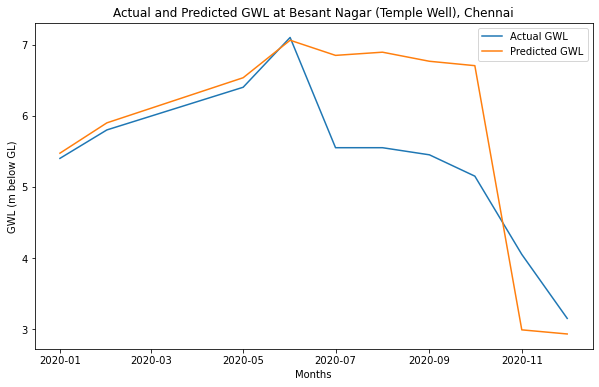

In [603]:
plt.figure(figsize=(10,6))
plt.plot(df['Month-Year'].iloc[-10:], df['Besant Nagar (Temple Well)'].iloc[-10:])
plt.plot(df['Month-Year'].iloc[-10:], out1)
plt.legend(["Actual GWL", "Predicted GWL"], loc ="upper right")
plt.title('Actual and Predicted GWL at Besant Nagar (Temple Well), Chennai')
plt.ylabel('GWL (m below GL)')
plt.xlabel('Months')
plt.show()